
## Time Series GPTs

* UCI Time series data 



## Libraries


In [1]:

## !pip install pandas
## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
## from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

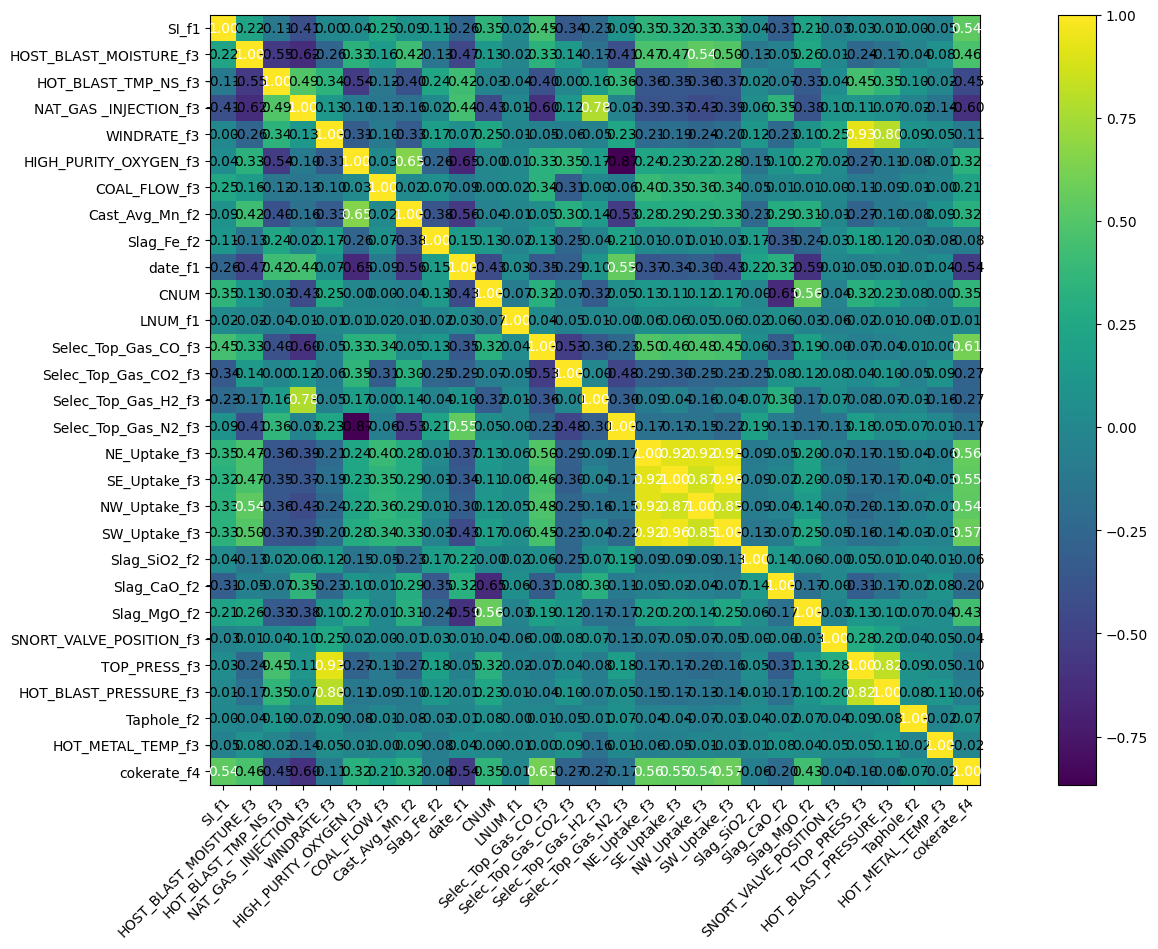

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## UCI data


In [15]:

tsDataWrangling_obj.read_UCI_data()


In [16]:

tsDataWrangling_obj.UCI_Energy_data_df 


date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4       RH_4  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  45.566667   
1      19.200000  44.722500  19.790000  44.790000  19.000000  45.992500   
2      19.200000  44.626667  19.790000  44.933333  18.926667  45.890000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  45.723333   
4      19.200000  44.530000  19.790000  45.000000  18.890000  45.530000   
...          ...        ...        ...        ...        ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  45.590000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  45.590000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  45.730000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  45.790000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  45.963333   

              T5       RH_5         T6       RH_6         T7       RH_7  \
0      17.166667  55.200000   7.026667  84.256667  17.200000  41.626667   
1      17.166667  55.200000   6.833333  84.063333  17.200000  41.560000   
2      17.166667  55.090000   6.560000  83.156667  17.200000  41.433333   
3      17.166667  55.090000   6.433333  83.423333  17.133333  41.290000   
4      17.200000  55.090000   6.366667  84.893333  17.200000  41.230000   
...          ...        ...        ...        ...        ...        ...   
19730  23.200000  52.400000  24.796667   1.000000  24.500000  44.500000   
19731  23.230000  52.326667  24.196667   1.000000  24.557143  44.414286   
19732  23.230000  52.266667  23.626667   1.000000  24.540000  44.400000   
19733  23.200000  52.200000  22.433333   1.000000  24.500000  44.295714   
19734  23.200000  52.200000  21.026667   1.000000  24.500000  44.054000   

            T8       RH_8         T9     RH_9      T_out  Press_mm_hg  \
0      18.2000  48.900000  17.033333  45.5300   6.600000        733.5   
1      18.2000  48.863333  17.066667  45.5600   6.483333        733.6   
2      18.2000  48.730000  17.000000  45.5000   6.366667        733.7   
3      18.1000  48.590000  17.000000  45.4000   6.250000        733.8   
4      18.1000  48.590000  17.000000  45.4000   6.133333        733.9   
...        ...        ...        ...      ...        ...          ...   
19730  24.7000  50.074000  23.200000  46.7900  22.733333        755.2   
19731  24.7000  49.790000  23.200000  46.7900  22.600000        755.2   
19732  24.7000  49.660000  23.200000  46.7900  22.466667        755.2   
19733  24.6625  49.518750  23.200000  46.8175  22.333333        755.2   
19734  24.7360  49.736000  23.200000  46.8450  22.200000        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0      92.000000   7.000000   63.000000   5.300000  13.275433  13.275433  
1      92.000000   6.666667   59.166667   5.200000  18.606195  18.606195  
2      92.000000   6.333333   55.333333   5.100000  28.642668  28.642668  
3      92.000000   6.000000   51.500000   5.000000  45.410389  45.410389  
4      92.000000   5.666667   47.666667   4.900000  10.084097  10.084097  
...          ...        ... 

In [17]:

tsDataWrangling_obj.format_appliances_data_to_match_CIVS()


In [18]:

tsDataWrangling_obj.UCI_Energy_data_df


lights         T1  Appliances       RH_1         T2       RH_2  \
0          30  19.890000          60  47.596667  19.200000  44.790000   
1          30  19.890000          60  46.693333  19.200000  44.722500   
2          30  19.890000          50  46.300000  19.200000  44.626667   
3          40  19.890000          50  46.066667  19.200000  44.590000   
4          40  19.890000          60  46.333333  19.200000  44.530000   
...       ...        ...         ...        ...        ...        ...   
19730       0  25.566667         100  46.560000  25.890000  42.025714   
19731       0  25.500000          90  46.500000  25.754000  42.080000   
19732      10  25.500000         270  46.596667  25.628571  42.768571   
19733      10  25.500000         420  46.990000  25.414000  43.036000   
19734      10  25.500000         430  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4         T5       RH_5  \
0      19.790000  44.730000  19.000000  45.566667  17.166667  55.200000   
1      19.790000  44.790000  19.000000  45.992500  17.166667  55.200000   
2      19.790000  44.933333  18.926667  45.890000  17.166667  55.090000   
3      19.790000  45.000000  18.890000  45.723333  17.166667  55.090000   
4      19.790000  45.000000  18.890000  45.530000  17.200000  55.090000   
...          ...        ...        ...        ...        ...        ...   
19730  27.200000  41.163333  24.700000  45.590000  23.200000  52.400000   
19731  27.133333  41.223333  24.700000  45.590000  23.230000  52.326667   
19732  27.050000  41.690000  24.700000  45.730000  23.230000  52.266667   
19733  26.890000  41.290000  24.700000  45.790000  23.200000  52.200000   
19734  26.823333  41.156667  24.700000  45.963333  23.200000  52.200000   

              T6       RH_6         T7       RH_7       T8       RH_8  \
0       7.026667  84.256667  17.200000  41.626667  18.2000  48.900000   
1       6.833333  84.063333  17.200000  41.560000  18.2000  48.863333   
2       6.560000  83.156667  17.200000  41.433333  18.2000  48.730000   
3       6.433333  83.423333  17.133333  41.290000  18.1000  48.590000   
4       6.366667  84.893333  17.200000  41.230000  18.1000  48.590000   
...          ...        ...        ...        ...      ...        ...   
19730  24.796667   1.000000  24.500000  44.500000  24.7000  50.074000   
19731  24.196667   1.000000  24.557143  44.414286  24.7000  49.790000   
19732  23.626667   1.000000  24.540000  44.400000  24.7000  49.660000   
19733  22.433333   1.000000  24.500000  44.295714  24.6625  49.518750   
19734  21.026667   1.000000  24.500000  44.054000  24.7360  49.736000   

              T9     RH_9      T_out  Press_mm_hg     RH_out  Windspeed  \
0      17.033333  45.5300   6.600000        733.5  92.000000   7.000000   
1      17.066667  45.5600   6.483333        733.6  92.000000   6.666667   
2      17.000000  45.5000   6.366667        733.7  92.000000   6.333333   
3      17.000000  45.4000   6.250000        733.8  92.000000   6.000000   
4      17.000000  45.4000   6.133333        733.9  92.000000   5.666667   
...          ...      ...        ...          ...        ...        ...   
19730  23.200000  46.7900  22.733333        755.2  55.666667   3.333333   
19731  23.200000  46.7900  22.600000        755.2  56.000000   3.500000   
19732  23.200000  46.7900  22.466667        755.2  56.333333   3.666667   
19733  23.200000  46.8175  22.333333        755.2  56.666667   3.833333   
19734  23.200000  46.8450  22.200000        755.2  57.000000   4.000000   

       Visibility  Tdewpoint        rv1        rv2  
0       63.000000   5.300000  13.275433  13.275433  
1       59.166667   5.200000  18.606195  18.606195  
2       55.333333   5.100000  28.642668  28.642668  
3       51.500000   5.000000  45.410389  45.410389  
4       47.666667   4.900000  10.084097  10.084097  
...           ...        ...        ...        ...  
19730   23.666667  13.333333  43.096812  43.096812  
19731   24.500000  13.30000

In [19]:

print(list(tsDataWrangling_obj.UCI_Energy_data_df.columns))   


['lights', 'T1', 'Appliances', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [20]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.UCI_Energy_data_df



## Correlation Matrix


In [21]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['lights', 'T1', 'Appliances', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 
                        'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 
                        'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [22]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lights       19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   Appliances   19735 non-null  int64  
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

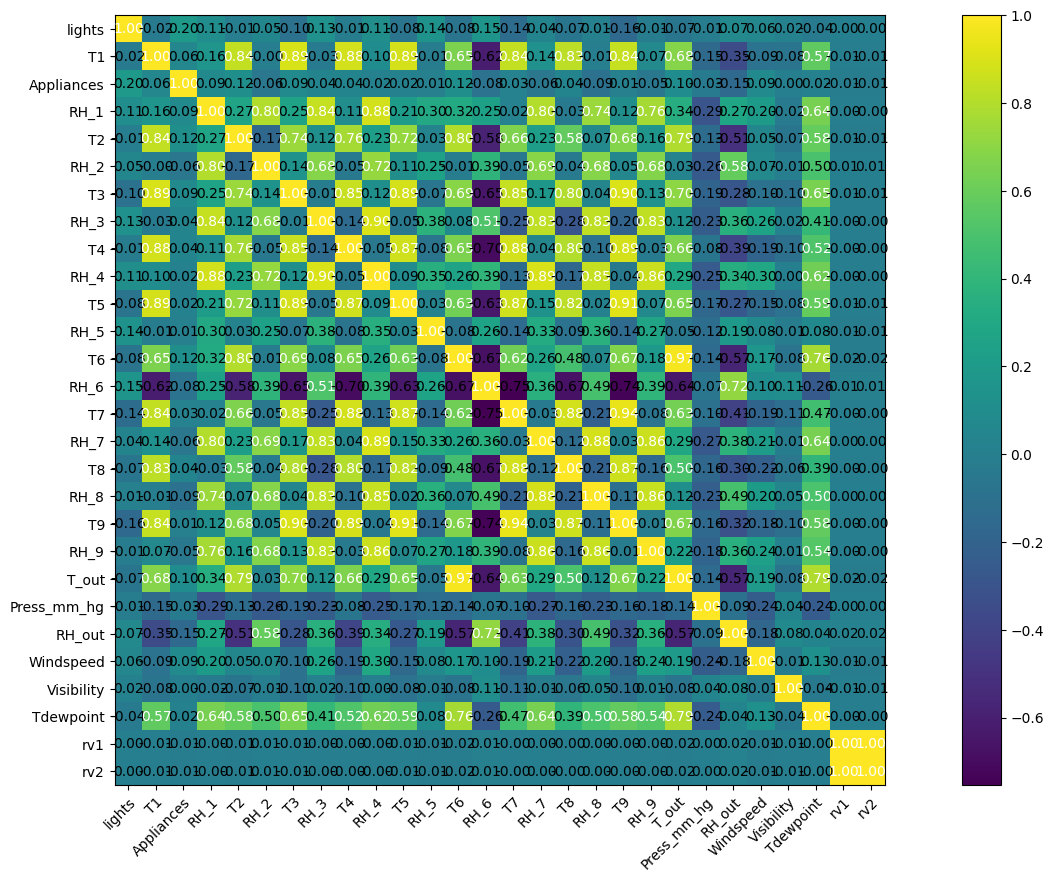

In [23]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [24]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


19735



## Training Functions


In [25]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [26]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [27]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [28]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [29]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        ## loss_SI     = F.mse_loss(    pred_si, y_si   )
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        ## loss_total  = alpha * loss_SI + (1 - alpha) * loss_all 
        
        ## alpha      = 0.9
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ###################################################################################
        
        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 50 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
        
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled





## Train on Train, Test on Test


In [30]:

 inferenceGPT_obj.initialize_preds_lists()



## Run 1


In [31]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.190574
Loss_SI: 1.3980274200439453 Loss_all: 1.1842525005340576
===
[50] Train Loss: 0.184109
Loss_SI: 0.6460689902305603 Loss_all: 0.18112264573574066
===


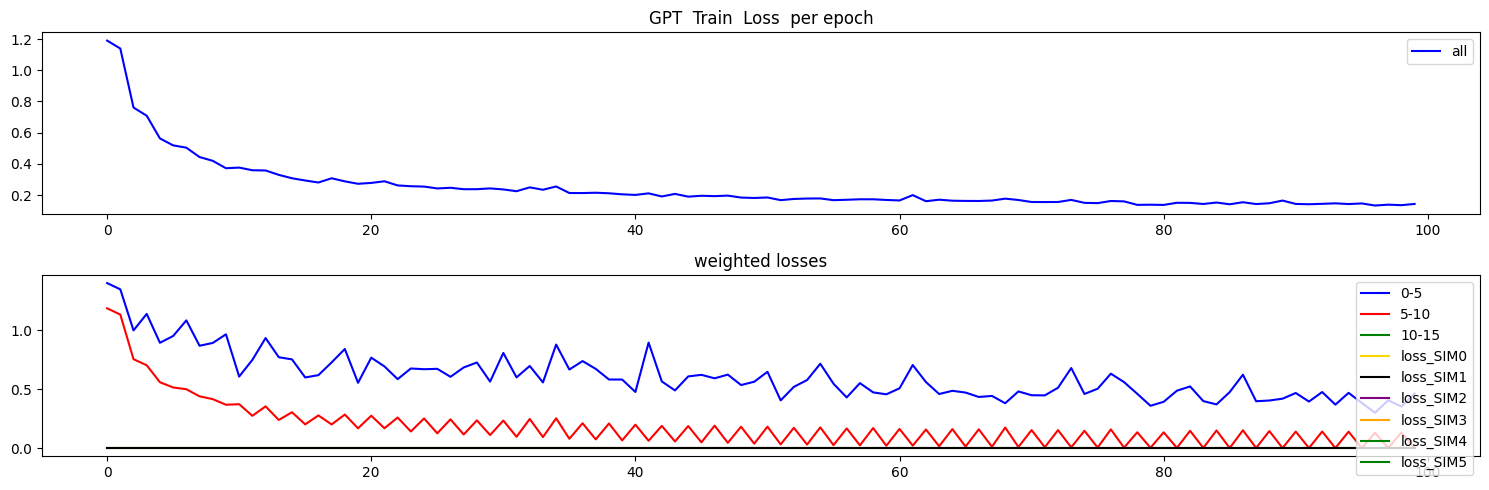

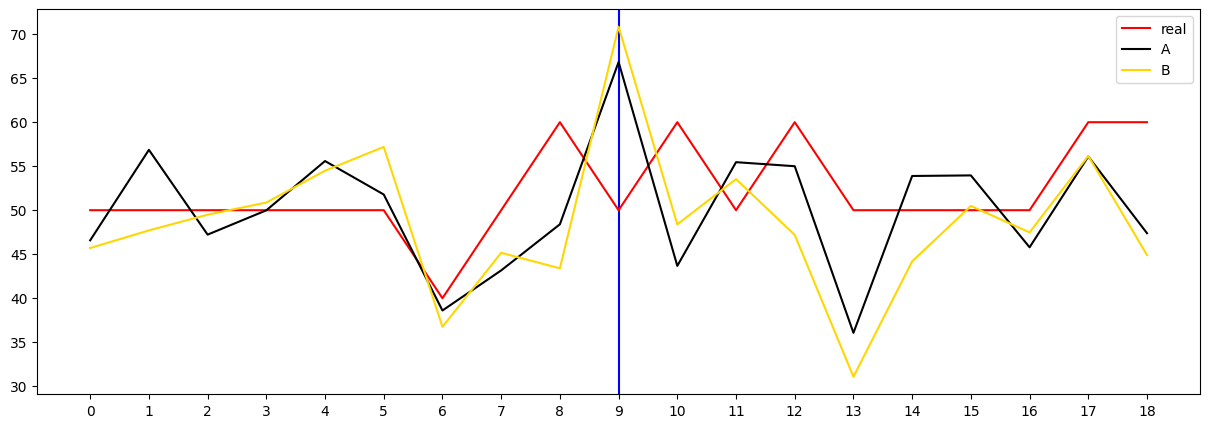

Which prediction is better? (A/B/skip): s


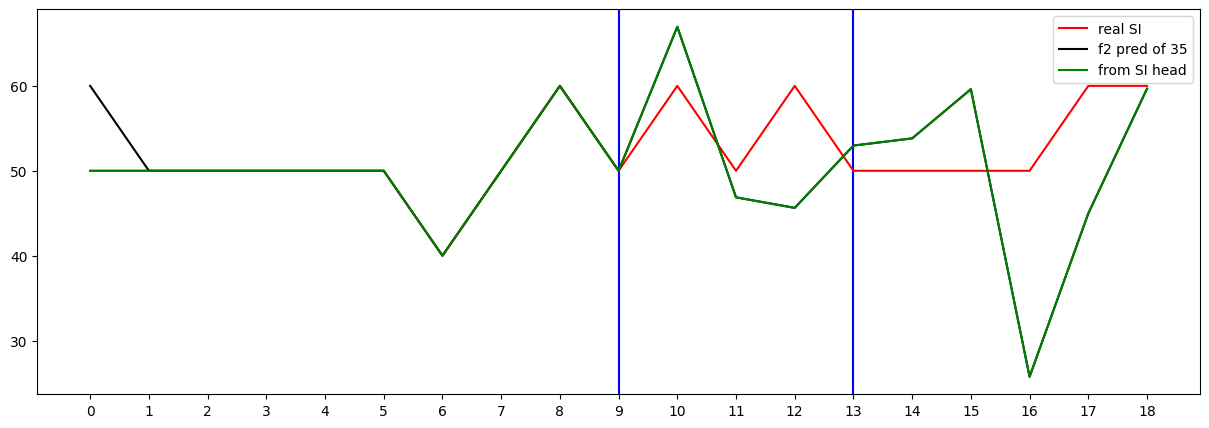

Testing R**2 - (all) - (no inputs):  0.9986693192882321
Testing R**2 - (f2) - SI full (no inputs):  -9.439676653105227
Testing R**2 - SI head only (no inputs):  -9.439676653105227
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -16.594226300684518
2 ...index R**2 (no inputs):  -9.439676653105227
3 ...index R**2 (no inputs):  -29.839388744237638
4 ...index R**2 (no inputs):  -33.12409747530008
5 ...index R**2 (no inputs):  -223.14338971494558
6 ...index R**2 (no inputs):  -0.2021047313500277
7 ...index R**2 (no inputs):  -3.1662895951339873
8 ...index R**2 (no inputs):  -4.059635085477023
9 ...index R**2 (no inputs):  -37.21121780590567
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -893.9878419292415
12 ...index R**2 (no inputs):  -70.4997448722266
13 ...index R**2 (no inputs):  -9.406075492963621
14 ...index R**2 (no inputs):  -1.2289659562061361
15 ...index R**2 (no inputs):  -2.9782373086401033
16 ...index R**2 (no inputs):  -9.194524784562516
17 .

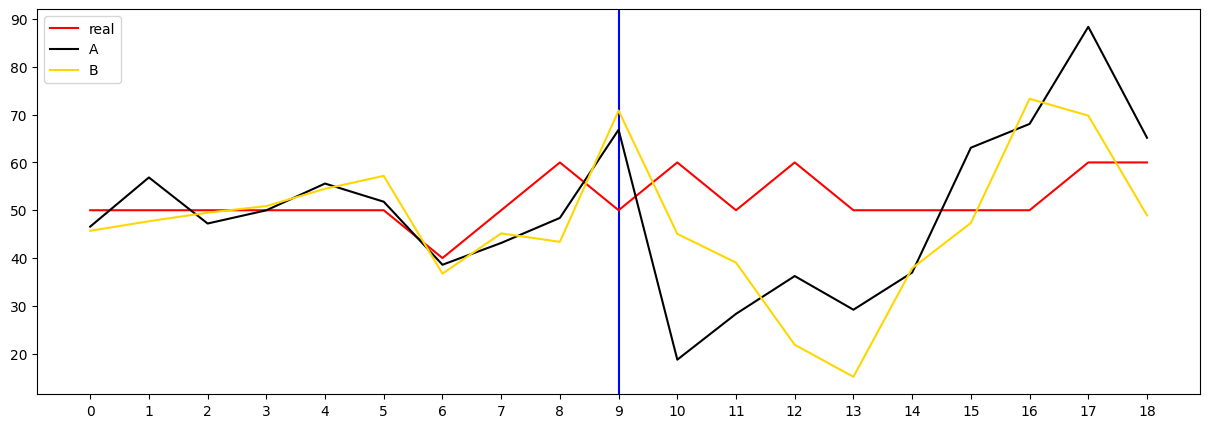

Which prediction is better? (A/B/skip): s


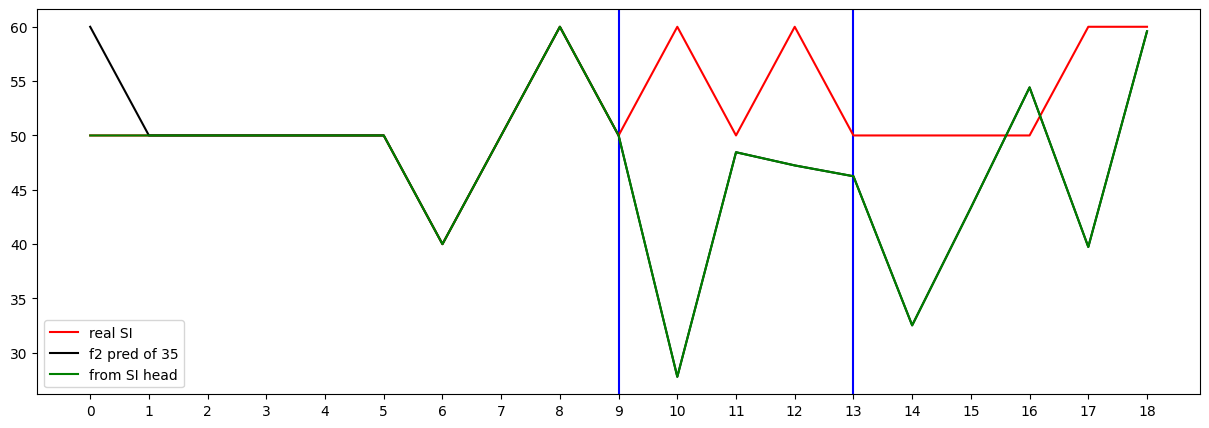

Testing R**2 - (all) - (no inputs):  0.9966735509238862
Testing R**2 - (f2) - SI full (no inputs):  -6.655077845476573
Testing R**2 - SI head only (no inputs):  -6.655077845476573
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -0.39033748531490997
2 ...index R**2 (no inputs):  -6.655077845476573
3 ...index R**2 (no inputs):  -423.25630966781216
4 ...index R**2 (no inputs):  -90.58893831431148
5 ...index R**2 (no inputs):  -25504.580134684453
6 ...index R**2 (no inputs):  -5.638624310368997
7 ...index R**2 (no inputs):  -1038.8319241090128
8 ...index R**2 (no inputs):  -3.2956639261780536
9 ...index R**2 (no inputs):  -1468.8026749130806
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -12604.52931675837
12 ...index R**2 (no inputs):  -282.2941840145718
13 ...index R**2 (no inputs):  -290.4688359389773
14 ...index R**2 (no inputs):  -1.3656897365191996
15 ...index R**2 (no inputs):  -94.30045300414635
16 ...index R**2 (no inputs):  -179.70241899894378
1

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )



[0] Train Loss: 1.348698
Loss_SI: 1.3466986417770386 Loss_all: 1.3420462608337402
===
[50] Train Loss: 0.209787
Loss_SI: 0.41818591952323914 Loss_all: 0.20654010772705078
===


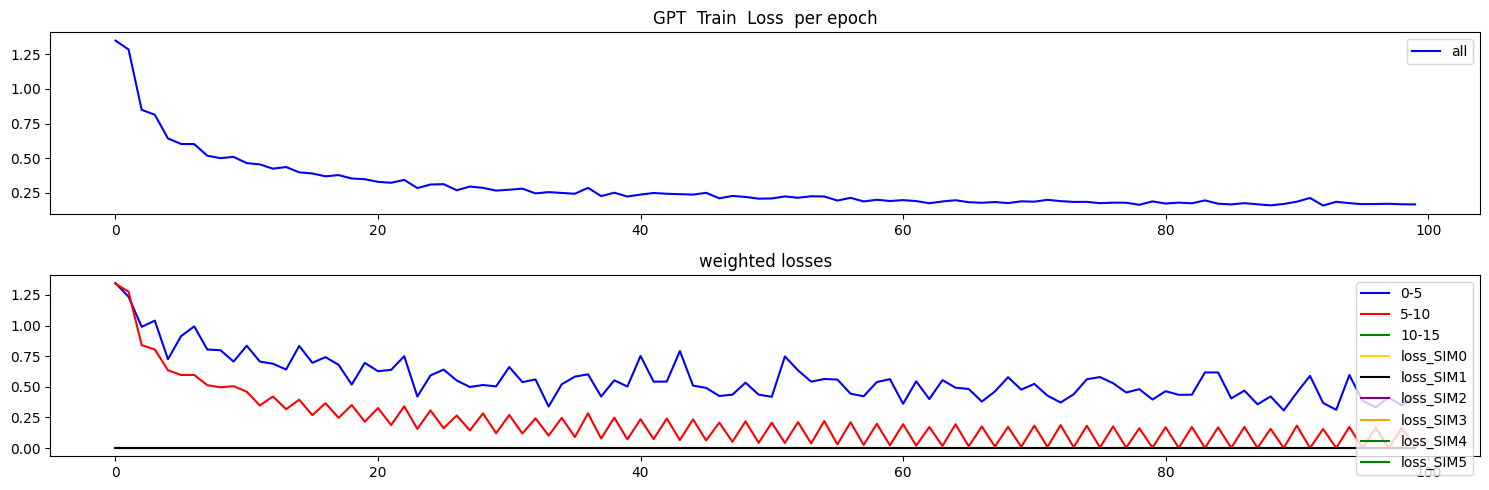

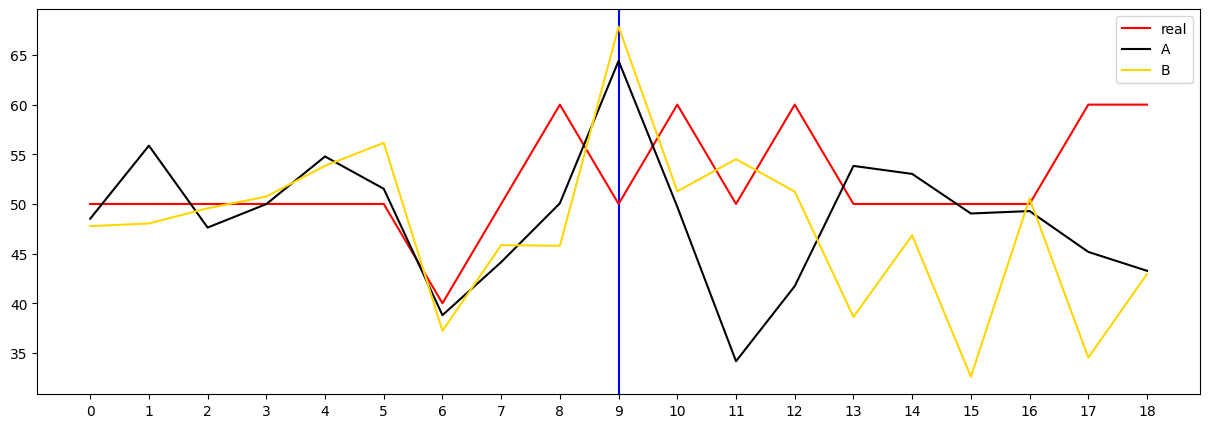

Which prediction is better? (A/B/skip): b
Saved preference.


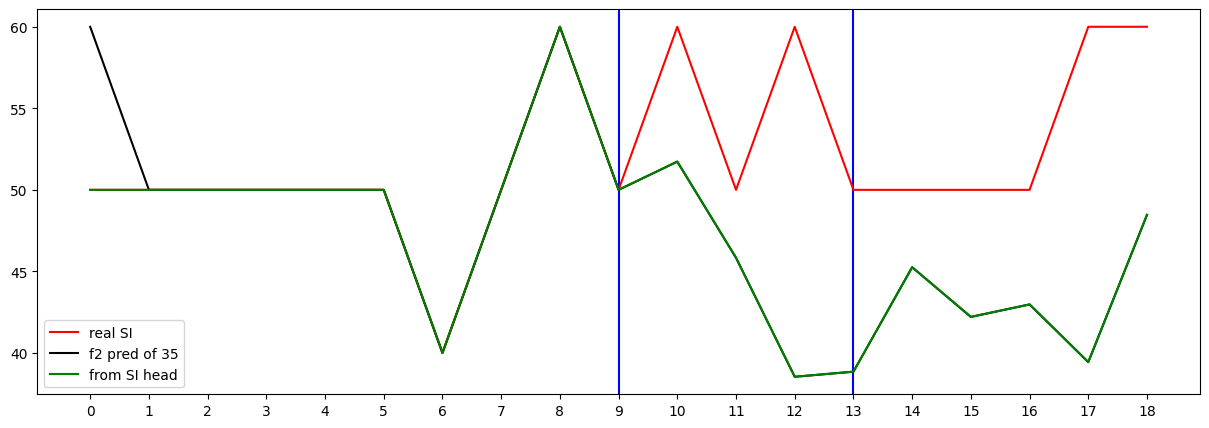

Testing R**2 - (all) - (no inputs):  0.9989725158480587
Testing R**2 - (f2) - SI full (no inputs):  -5.288138427006942
Testing R**2 - SI head only (no inputs):  -5.288138427006942
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -92.0055178950741
2 ...index R**2 (no inputs):  -5.288138427006942
3 ...index R**2 (no inputs):  -101.51775102851214
4 ...index R**2 (no inputs):  -27.01420929195059
5 ...index R**2 (no inputs):  -112.89073340355651
6 ...index R**2 (no inputs):  -6.02730960356991
7 ...index R**2 (no inputs):  -15.773846526076035
8 ...index R**2 (no inputs):  -28.583813381858384
9 ...index R**2 (no inputs):  -232.05907672891857
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -1467.0683783599077
12 ...index R**2 (no inputs):  -11.352912285148584
13 ...index R**2 (no inputs):  -9.042000075177656
14 ...index R**2 (no inputs):  -14.858288003515323
15 ...index R**2 (no inputs):  -39.86666327896221
16 ...index R**2 (no inputs):  -15.63919526274945
17 .

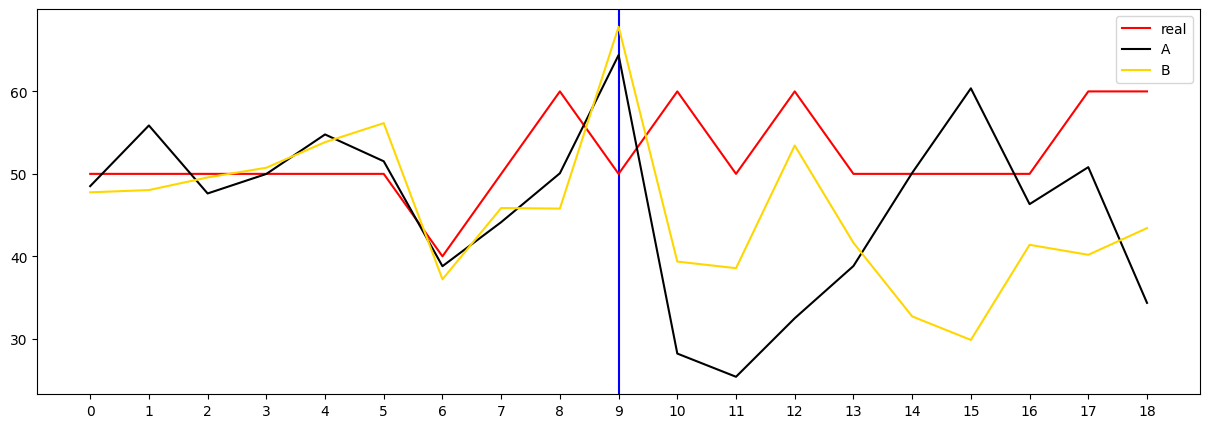

Which prediction is better? (A/B/skip): b
Saved preference.


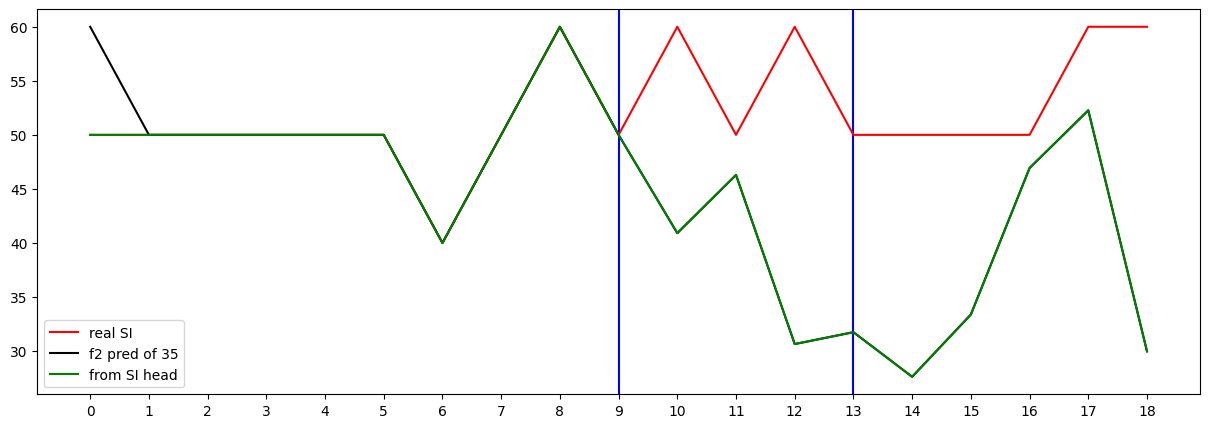

Testing R**2 - (all) - (no inputs):  0.9972096007727462
Testing R**2 - (f2) - SI full (no inputs):  -10.935899544984826
Testing R**2 - SI head only (no inputs):  -10.935899544984826
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -8.677541226240509
2 ...index R**2 (no inputs):  -10.935899544984826
3 ...index R**2 (no inputs):  -233.84672277300245
4 ...index R**2 (no inputs):  -103.32012729221391
5 ...index R**2 (no inputs):  -11504.882392612344
6 ...index R**2 (no inputs):  -21.80914036288889
7 ...index R**2 (no inputs):  -139.90437129705393
8 ...index R**2 (no inputs):  -2.373059630513529
9 ...index R**2 (no inputs):  -67.2633574278898
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -5457.486760857656
12 ...index R**2 (no inputs):  -137.5190845041798
13 ...index R**2 (no inputs):  -62.48533722779103
14 ...index R**2 (no inputs):  -24.5412392637588
15 ...index R**2 (no inputs):  -18.28476397387942
16 ...index R**2 (no inputs):  -867.6569553380203
17 ..

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




[0] Train Loss: 1.358399
Loss_SI: 1.2933274507522583 Loss_all: 1.3518022298812866
===
[50] Train Loss: 0.232329
Loss_SI: 0.49861153960227966 Loss_all: 0.2299627810716629
===


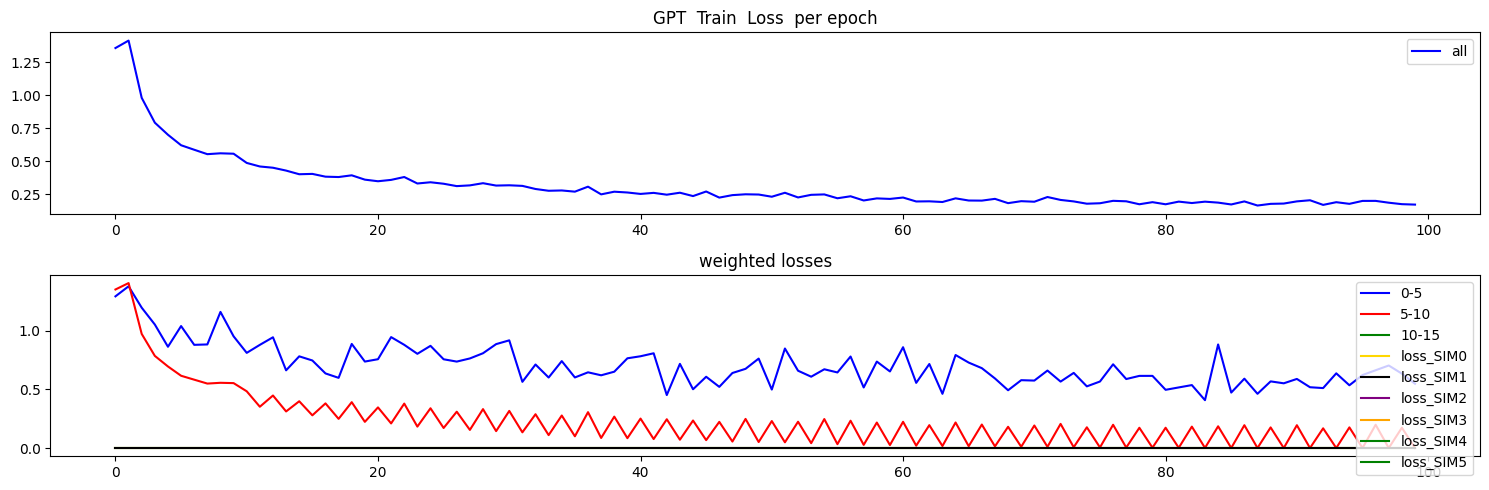

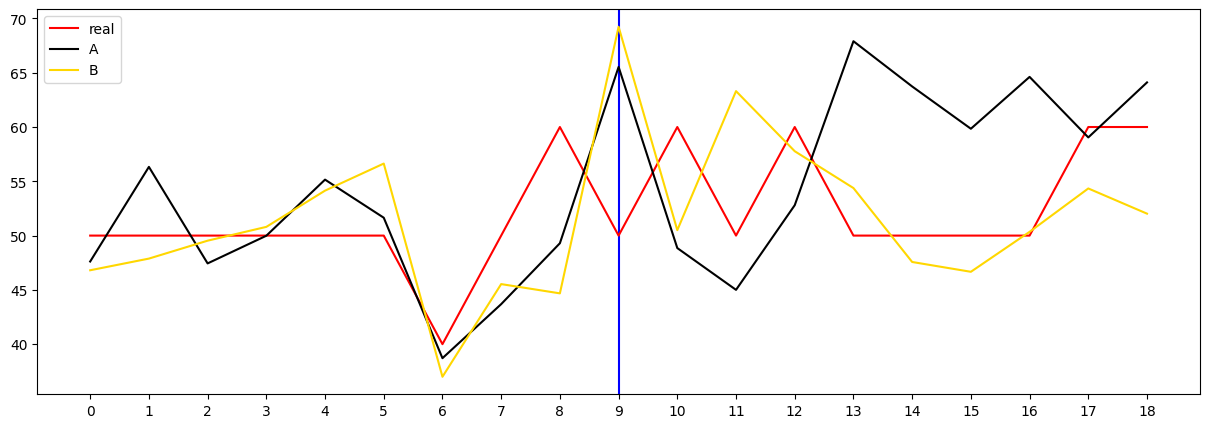

Which prediction is better? (A/B/skip): b
Saved preference.


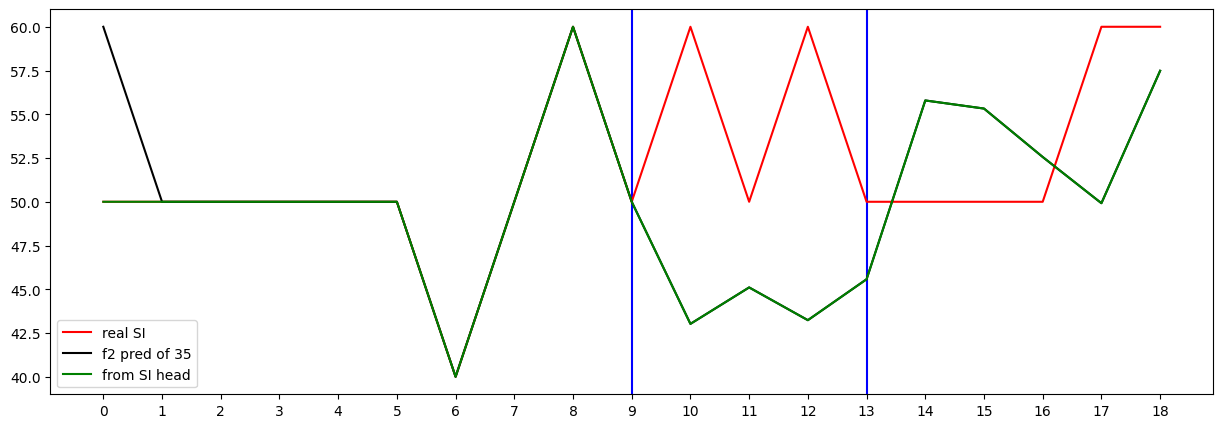

Testing R**2 - (all) - (no inputs):  0.9991146975175331
Testing R**2 - (f2) - SI full (no inputs):  -2.0541038788966395
Testing R**2 - SI head only (no inputs):  -2.0541038788966395
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -52.35834280102685
2 ...index R**2 (no inputs):  -2.0541038788966395
3 ...index R**2 (no inputs):  -83.9302312419976
4 ...index R**2 (no inputs):  -53.33759007112886
5 ...index R**2 (no inputs):  -49.39929393277671
6 ...index R**2 (no inputs):  -20.306526870811215
7 ...index R**2 (no inputs):  -8.2360378868963
8 ...index R**2 (no inputs):  -2.437082797092829
9 ...index R**2 (no inputs):  -358.9180136659634
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -651.7242479399531
12 ...index R**2 (no inputs):  -30.693382760188282
13 ...index R**2 (no inputs):  -8.133266280363962
14 ...index R**2 (no inputs):  -1.3979803340144241
15 ...index R**2 (no inputs):  -48.69276047939154
16 ...index R**2 (no inputs):  -53.77508642743595
17 ...i

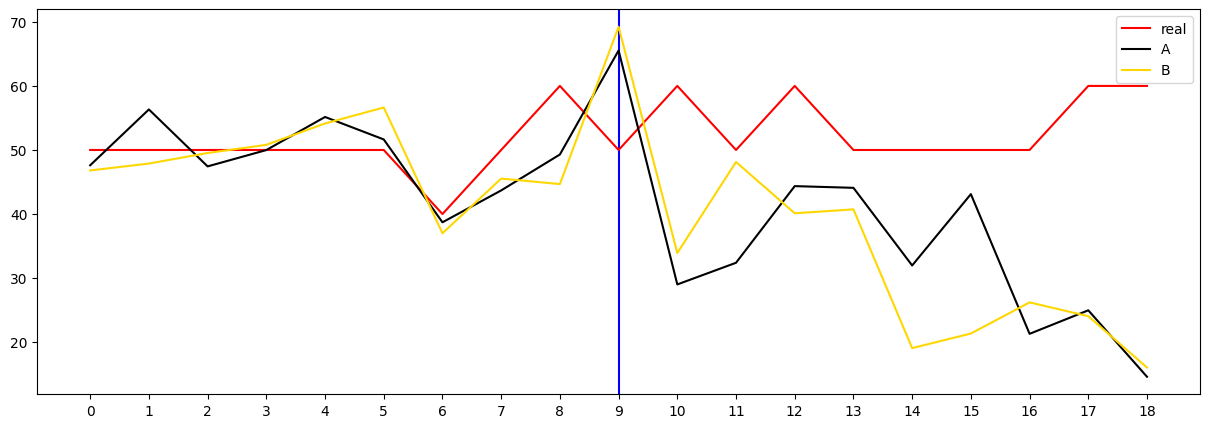

Which prediction is better? (A/B/skip): s


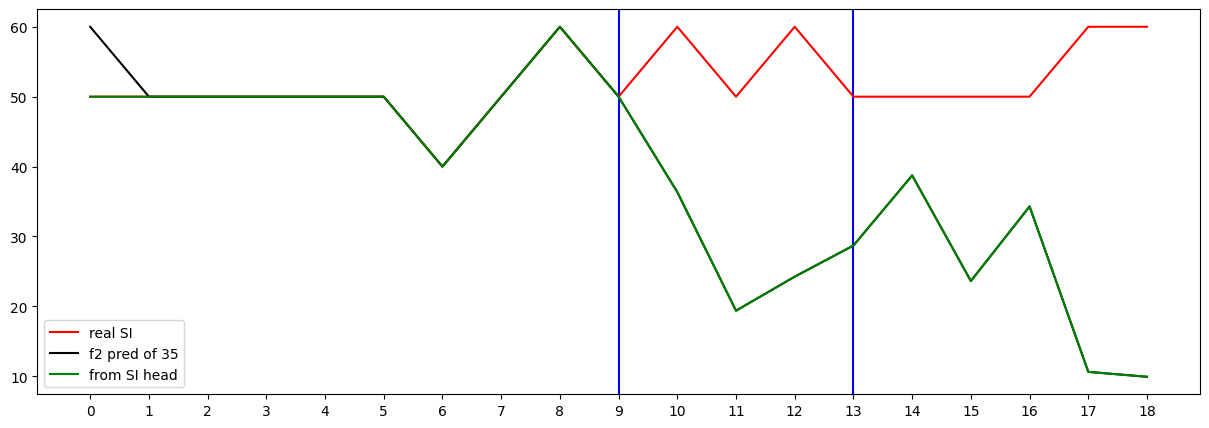

Testing R**2 - (all) - (no inputs):  0.9959155898389078
Testing R**2 - (f2) - SI full (no inputs):  -41.39000361652367
Testing R**2 - SI head only (no inputs):  -41.39000361652367
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -230.1585494311586
2 ...index R**2 (no inputs):  -41.39000361652367
3 ...index R**2 (no inputs):  -1065.0953981205591
4 ...index R**2 (no inputs):  -48.89301808392452
5 ...index R**2 (no inputs):  -17753.253433108148
6 ...index R**2 (no inputs):  -91.41084466859316
7 ...index R**2 (no inputs):  -277.34510629387034
8 ...index R**2 (no inputs):  -313.02033444322825
9 ...index R**2 (no inputs):  -955.9354319824797
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -15045.826886376992
12 ...index R**2 (no inputs):  -32.48206999422853
13 ...index R**2 (no inputs):  -24.160805786997965
14 ...index R**2 (no inputs):  -6.7070813378070415
15 ...index R**2 (no inputs):  -374.58292693306487
16 ...index R**2 (no inputs):  -600.7820956585978
17

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.379850
Loss_SI: 1.3654056787490845 Loss_all: 1.373267650604248
===
[50] Train Loss: 0.234818
Loss_SI: 0.6205399632453918 Loss_all: 0.2324143499135971
===


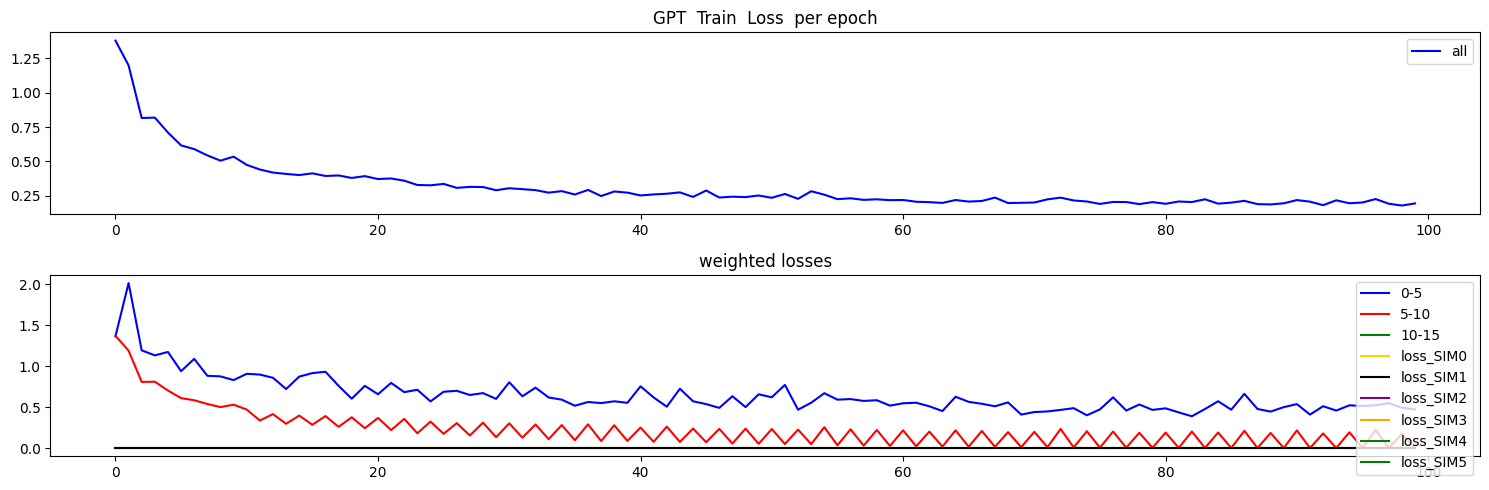

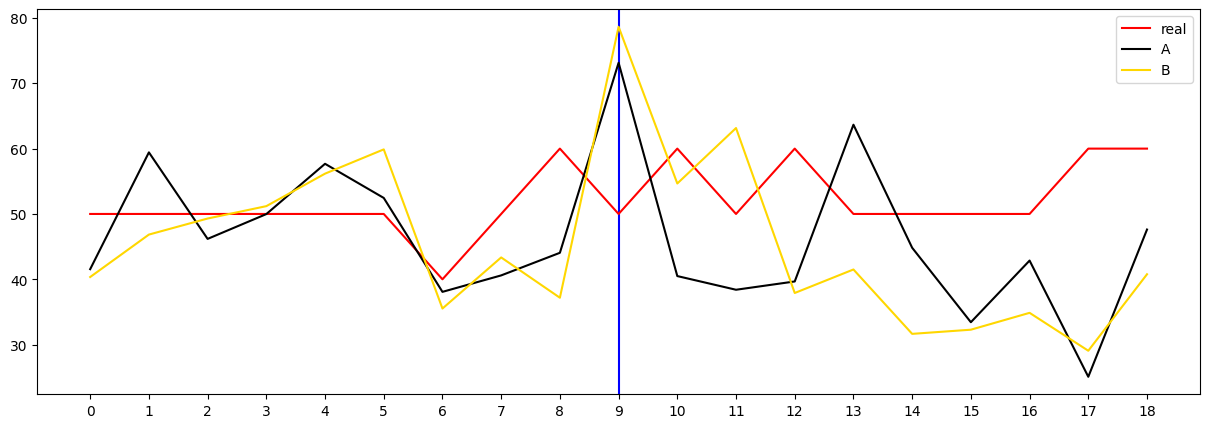

Which prediction is better? (A/B/skip): b
Saved preference.


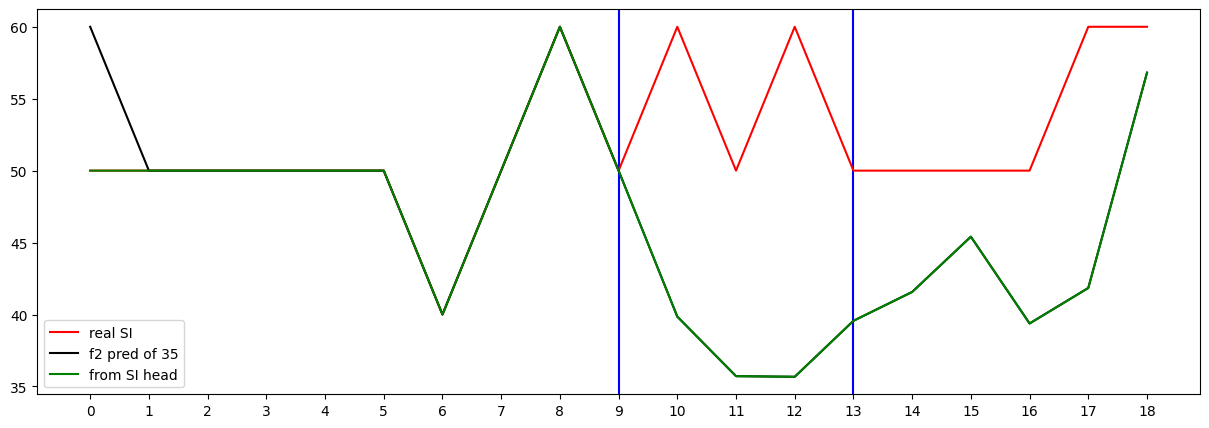

Testing R**2 - (all) - (no inputs):  0.9987839202128272
Testing R**2 - (f2) - SI full (no inputs):  -8.502259988741685
Testing R**2 - SI head only (no inputs):  -8.502259988741685
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -131.38929859911758
2 ...index R**2 (no inputs):  -8.502259988741685
3 ...index R**2 (no inputs):  -20.720153702714004
4 ...index R**2 (no inputs):  -27.505509669428008
5 ...index R**2 (no inputs):  -107.43441832906726
6 ...index R**2 (no inputs):  -21.691237233864886
7 ...index R**2 (no inputs):  -3.0735334703716877
8 ...index R**2 (no inputs):  -12.687069124052243
9 ...index R**2 (no inputs):  -97.77235150895551
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -362.208102853783
12 ...index R**2 (no inputs):  -61.182888357045876
13 ...index R**2 (no inputs):  -9.33663808398874
14 ...index R**2 (no inputs):  -3.6904133682271283
15 ...index R**2 (no inputs):  -25.592467104089668
16 ...index R**2 (no inputs):  -89.0431552261294
17 

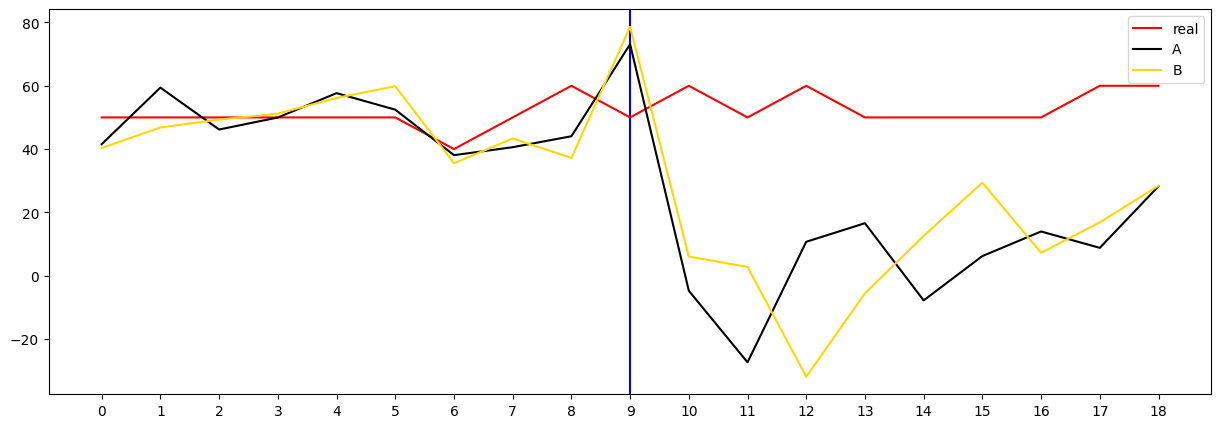

Which prediction is better? (A/B/skip): s


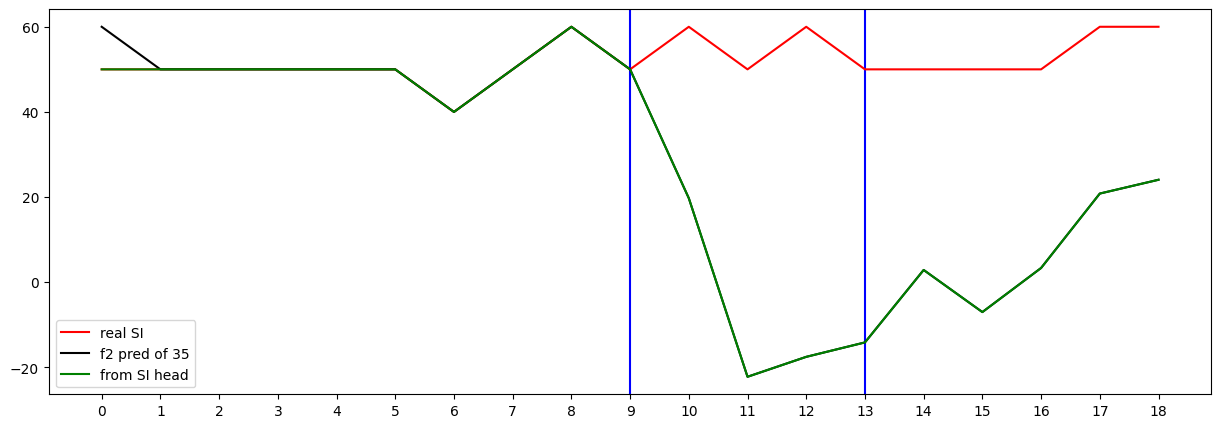

Testing R**2 - (all) - (no inputs):  0.992126877361604
Testing R**2 - (f2) - SI full (no inputs):  -135.15328078931273
Testing R**2 - SI head only (no inputs):  -135.15328078931273
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -552.6966399698013
2 ...index R**2 (no inputs):  -135.15328078931273
3 ...index R**2 (no inputs):  -104.6878430597973
4 ...index R**2 (no inputs):  -310.5198896472455
5 ...index R**2 (no inputs):  -1908.6040720588555
6 ...index R**2 (no inputs):  -93.00868596093844
7 ...index R**2 (no inputs):  -75.57526295114755
8 ...index R**2 (no inputs):  -120.43284424011976
9 ...index R**2 (no inputs):  -4893.240811198794
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -97.75907213052443
12 ...index R**2 (no inputs):  -805.1132819235377
13 ...index R**2 (no inputs):  -102.16289567923319
14 ...index R**2 (no inputs):  -112.82378799931988
15 ...index R**2 (no inputs):  -810.7731450855554
16 ...index R**2 (no inputs):  -52.089946879484
17 ...

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.335099
Loss_SI: 1.2935326099395752 Loss_all: 1.328534722328186
===
[50] Train Loss: 0.236520
Loss_SI: 0.4412681758403778 Loss_all: 0.2341138869524002
===


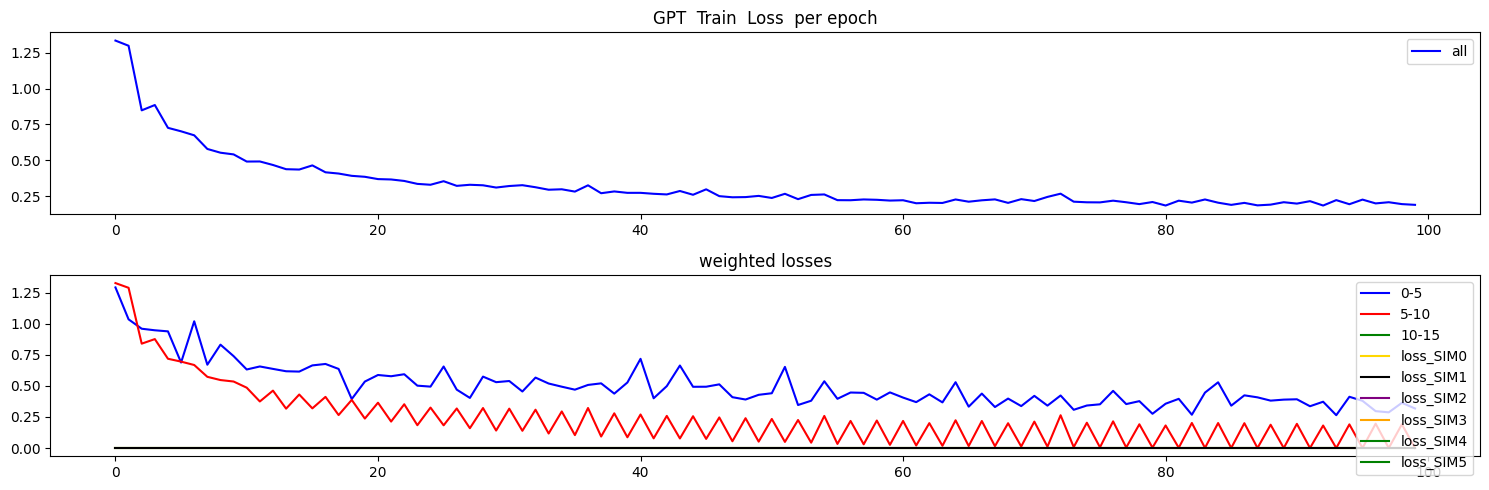

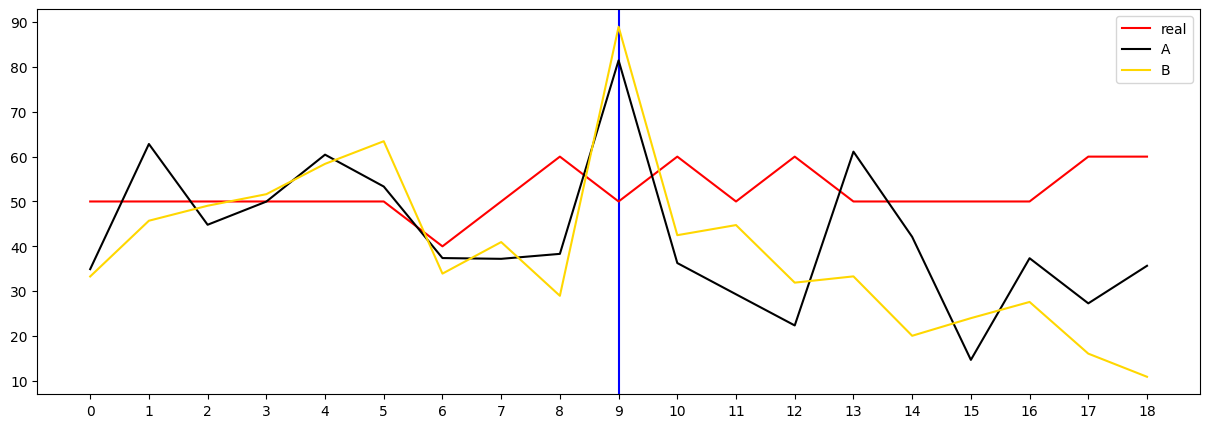

Which prediction is better? (A/B/skip): s


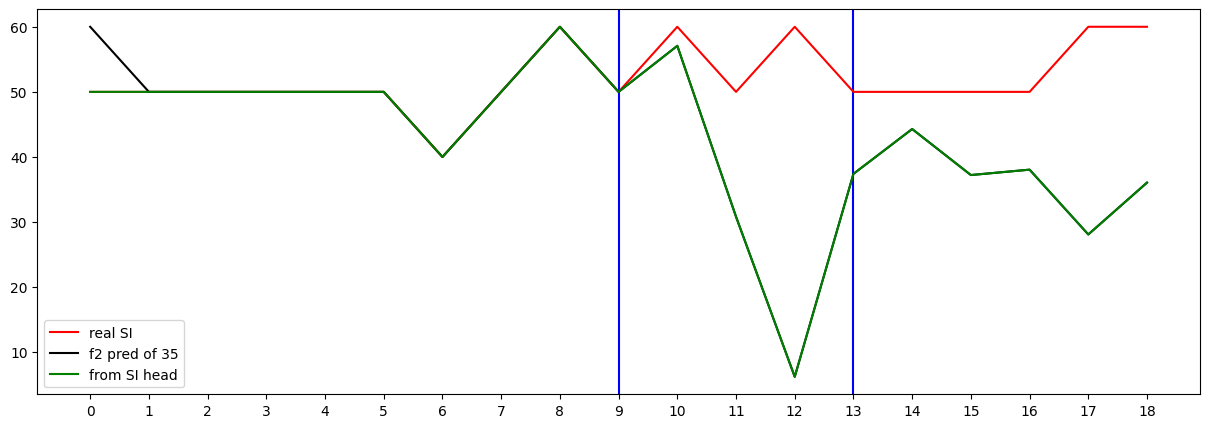

Testing R**2 - (all) - (no inputs):  0.9980184240723
Testing R**2 - (f2) - SI full (no inputs):  -23.332590936039143
Testing R**2 - SI head only (no inputs):  -23.332590936039143
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -68.80522111240805
2 ...index R**2 (no inputs):  -23.332590936039143
3 ...index R**2 (no inputs):  -33.896847223592566
4 ...index R**2 (no inputs):  -8.88183304994203
5 ...index R**2 (no inputs):  -63.56488900803218
6 ...index R**2 (no inputs):  -6.39942278335827
7 ...index R**2 (no inputs):  -6.314183172320282
8 ...index R**2 (no inputs):  -35.24335234829338
9 ...index R**2 (no inputs):  -38.76306355620678
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -3666.071361453886
12 ...index R**2 (no inputs):  -7.483467230435595
13 ...index R**2 (no inputs):  -7.646187322847997
14 ...index R**2 (no inputs):  -12.648202619903659
15 ...index R**2 (no inputs):  -27.86549146682747
16 ...index R**2 (no inputs):  -82.95121002347192
17 ...inde

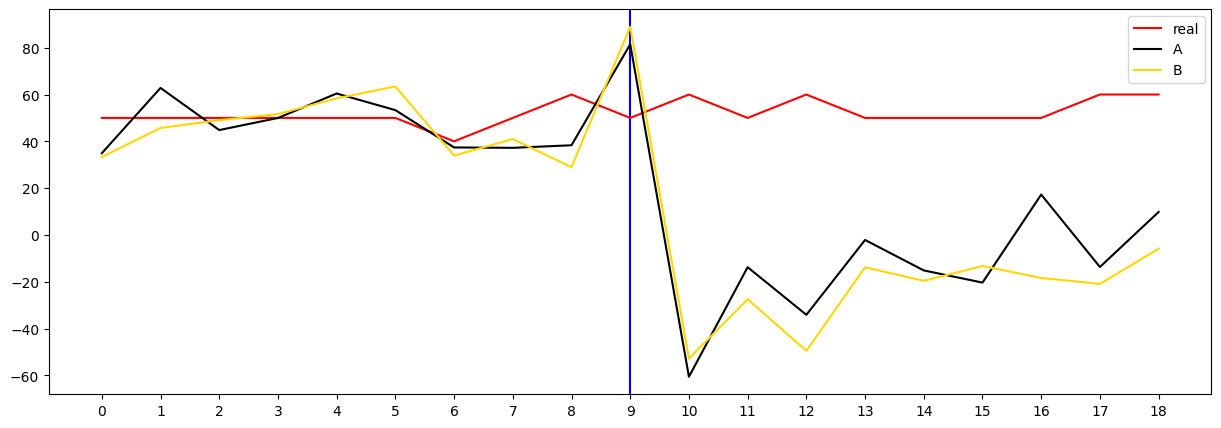

Which prediction is better? (A/B/skip): s


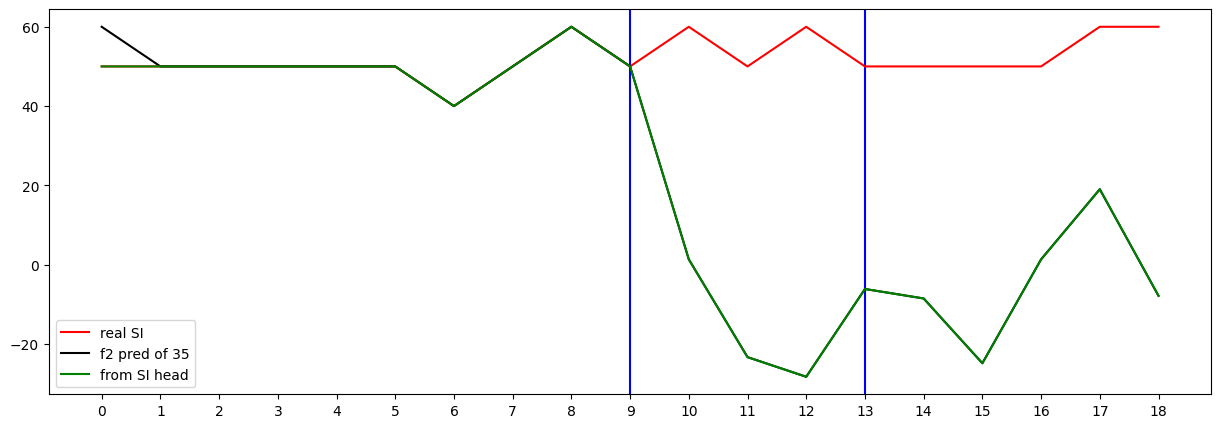

Testing R**2 - (all) - (no inputs):  0.9903760459401386
Testing R**2 - (f2) - SI full (no inputs):  -179.40982688122125
Testing R**2 - SI head only (no inputs):  -179.40982688122125
0 ...index R**2 (no inputs):  0.0
1 ...index R**2 (no inputs):  -555.1892328540735
2 ...index R**2 (no inputs):  -179.40982688122125
3 ...index R**2 (no inputs):  -1763.363647921635
4 ...index R**2 (no inputs):  -426.0198207421549
5 ...index R**2 (no inputs):  -10989.870164424938
6 ...index R**2 (no inputs):  -344.86764849513116
7 ...index R**2 (no inputs):  -132.76096073083175
8 ...index R**2 (no inputs):  -2.6917237730485444
9 ...index R**2 (no inputs):  -617.3733997394455
10 ...index R**2 (no inputs):  0.0
11 ...index R**2 (no inputs):  -4025.1761314900086
12 ...index R**2 (no inputs):  -551.2074356998278
13 ...index R**2 (no inputs):  -57.134703571813446
14 ...index R**2 (no inputs):  -400.4363890590715
15 ...index R**2 (no inputs):  -67.79684051058288
16 ...index R**2 (no inputs):  -7.491478437536507
1

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )




## Run 2


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.280874
Loss_SI: 1.2241026163101196 Loss_all: 1.2743003368377686
===
[50] Train Loss: 0.193824
Loss_SI: 0.49640369415283203 Loss_all: 0.19008034467697144
===


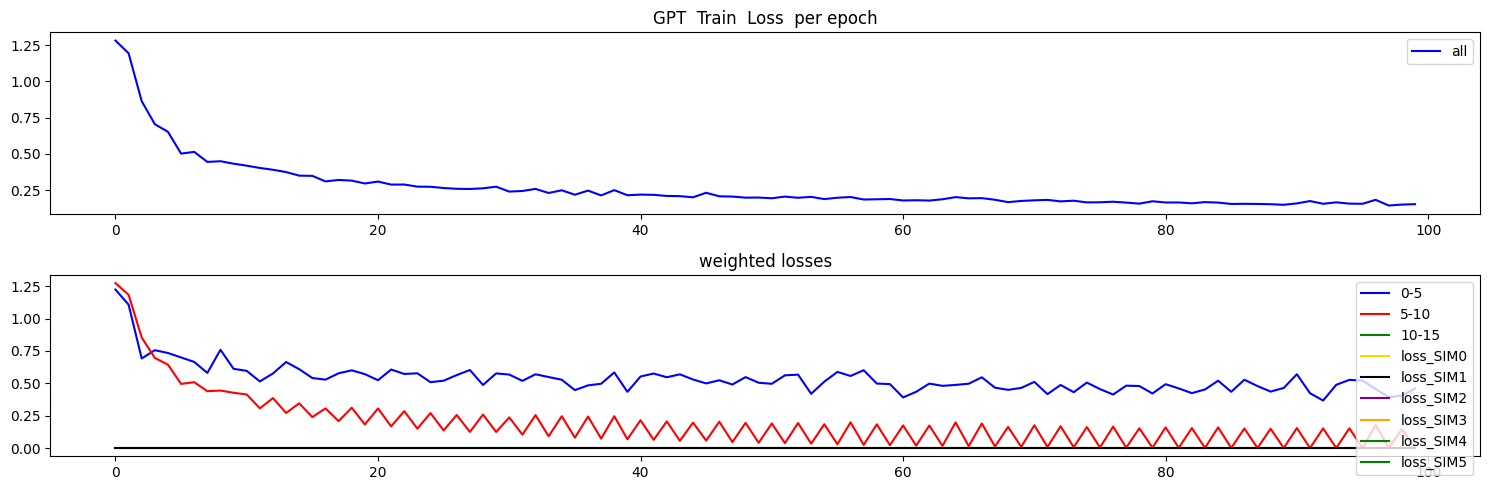

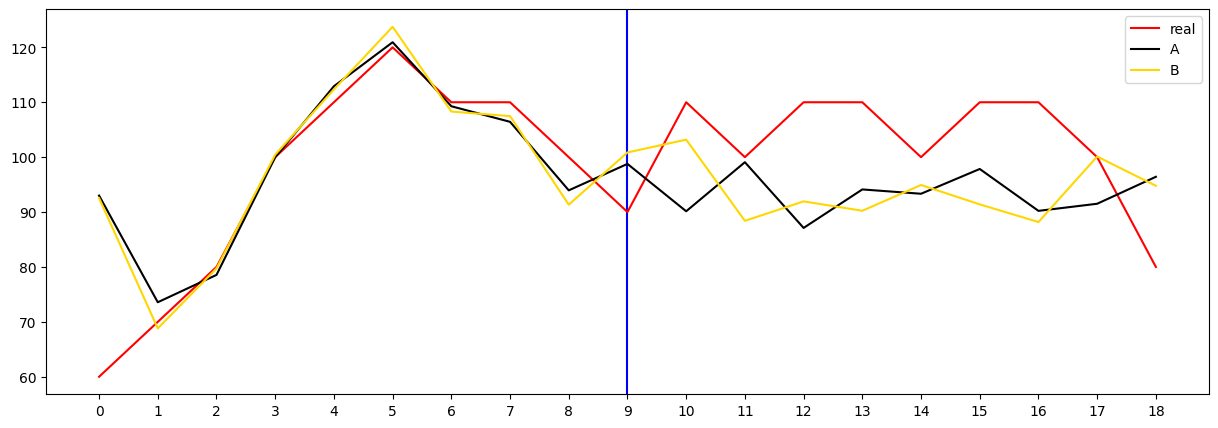

Which prediction is better? (A/B/skip): s


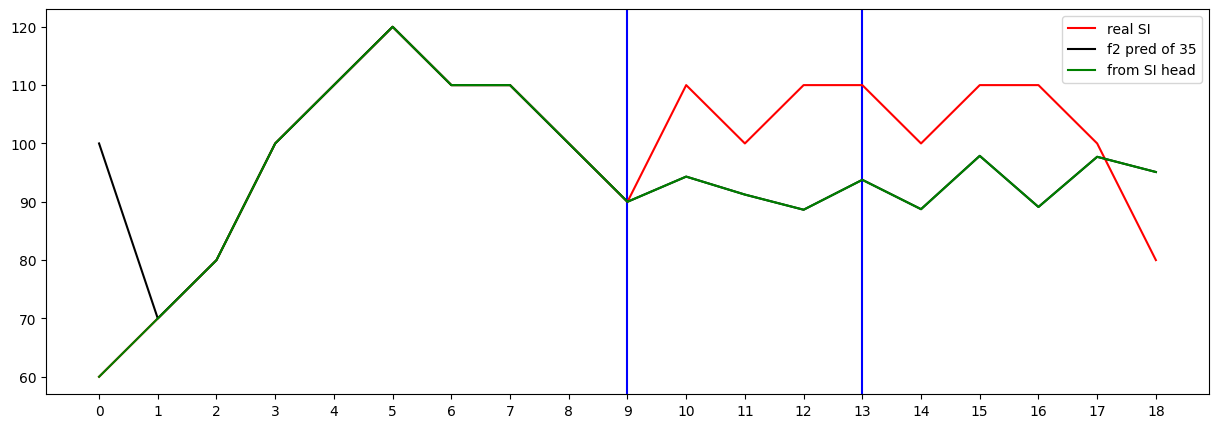

Testing R**2 - (all) - (no inputs):  0.9978075431923463
Testing R**2 - (f2) - SI full (no inputs):  -0.3345865996099766
Testing R**2 - SI head only (no inputs):  -0.3345865996099766
0 ...index R**2 (no inputs):  -6.628862324719515
1 ...index R**2 (no inputs):  -56.1224512497817
2 ...index R**2 (no inputs):  -0.3345865996099766
3 ...index R**2 (no inputs):  -1.3424866929181944
4 ...index R**2 (no inputs):  -7.957882363137552
5 ...index R**2 (no inputs):  -1.0624319729588696
6 ...index R**2 (no inputs):  -18.08377762418454
7 ...index R**2 (no inputs):  -62.44817006207511
8 ...index R**2 (no inputs):  -21.129338778565142
9 ...index R**2 (no inputs):  -14.837892759184937
10 ...index R**2 (no inputs):  -14.252171754676366
11 ...index R**2 (no inputs):  -66.19408924500274
12 ...index R**2 (no inputs):  -5.352807222949575
13 ...index R**2 (no inputs):  -5.40090710973555
14 ...index R**2 (no inputs):  -0.5168161389548314
15 ...index R**2 (no inputs):  -35.830255460584915
16 ...index R**2 (no i

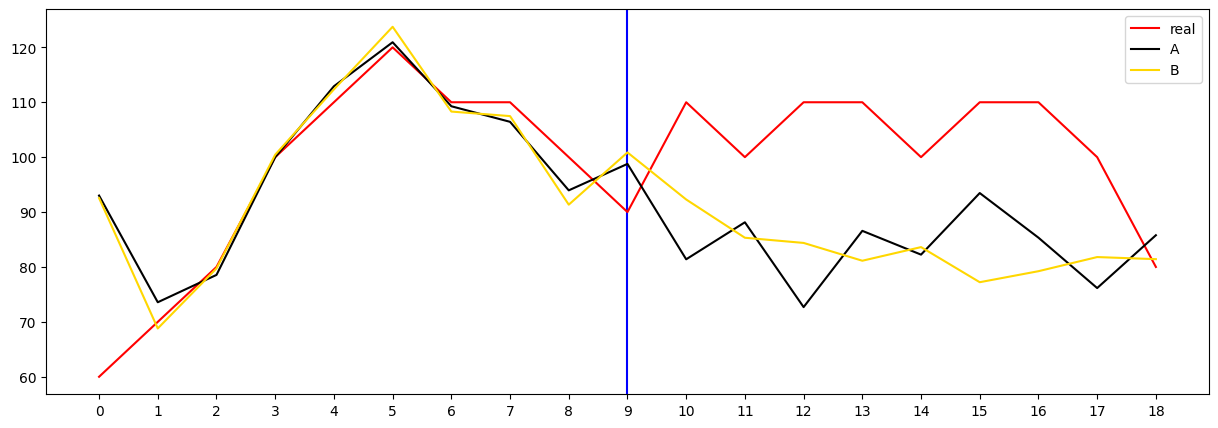

Which prediction is better? (A/B/skip): b
Saved preference.


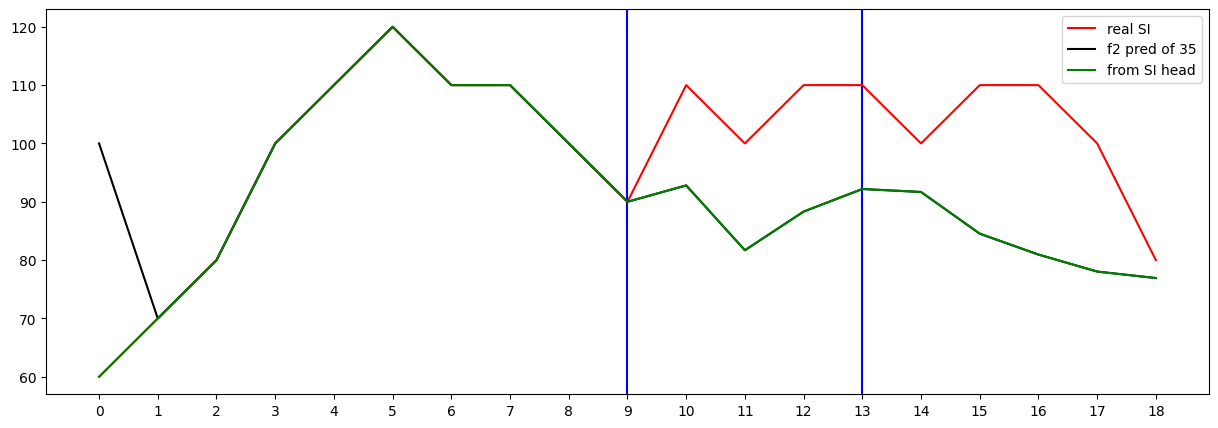

Testing R**2 - (all) - (no inputs):  0.9977814940677487
Testing R**2 - (f2) - SI full (no inputs):  -0.2827883838665526
Testing R**2 - SI head only (no inputs):  -0.2827883838665526
0 ...index R**2 (no inputs):  -0.5871168252463765
1 ...index R**2 (no inputs):  -5.111026773946321
2 ...index R**2 (no inputs):  -0.2827883838665526
3 ...index R**2 (no inputs):  -7.113786953837012
4 ...index R**2 (no inputs):  -5.269527817513272
5 ...index R**2 (no inputs):  -8.785555529727153
6 ...index R**2 (no inputs):  -18.636007081531346
7 ...index R**2 (no inputs):  -97.65419408583334
8 ...index R**2 (no inputs):  -374.63374088467697
9 ...index R**2 (no inputs):  -4.621407968199825
10 ...index R**2 (no inputs):  -130.39458464906465
11 ...index R**2 (no inputs):  -18.23967827523147
12 ...index R**2 (no inputs):  -22.75902494642312
13 ...index R**2 (no inputs):  -3.182413794842443
14 ...index R**2 (no inputs):  -0.0008140809046242037
15 ...index R**2 (no inputs):  -550.2985084053521
16 ...index R**2 (n

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.208695
Loss_SI: 1.558427333831787 Loss_all: 1.202088475227356
===
[50] Train Loss: 0.245133
Loss_SI: 0.5742290616035461 Loss_all: 0.2424517571926117
===


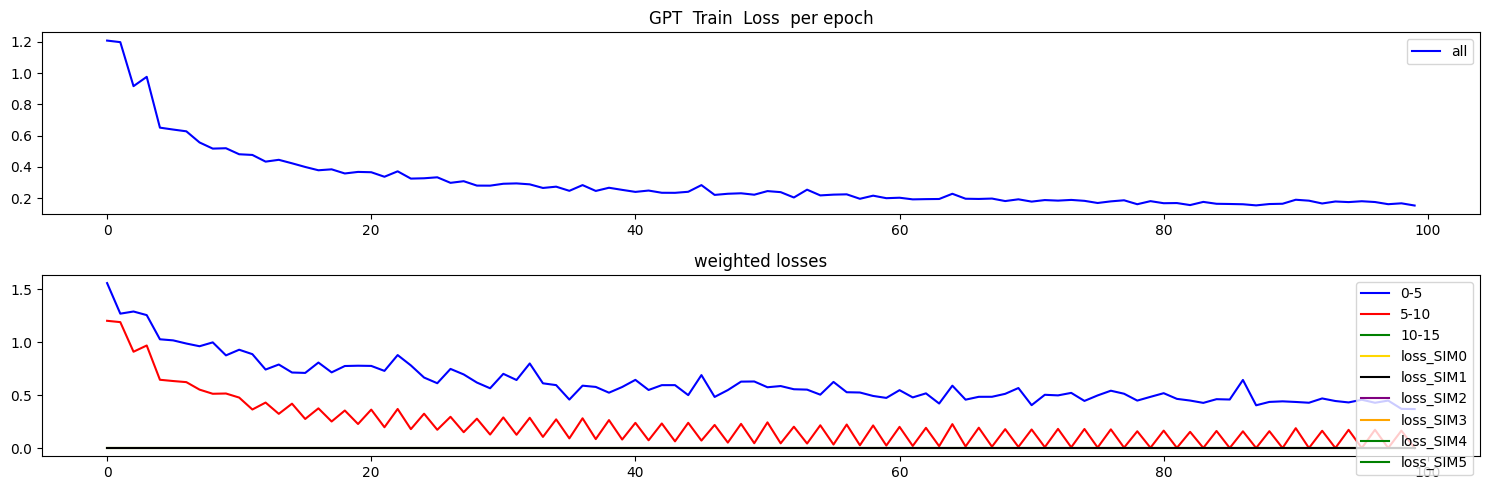

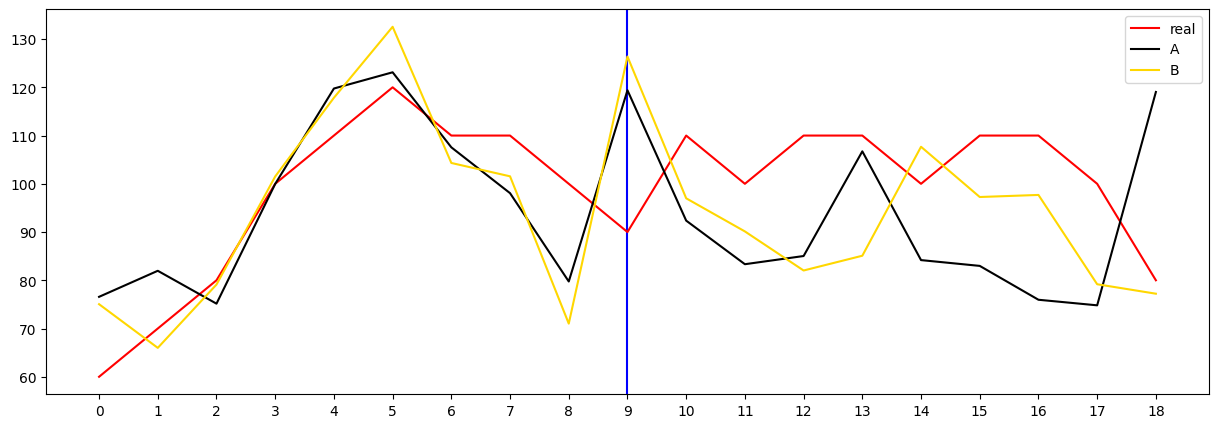

Which prediction is better? (A/B/skip): s


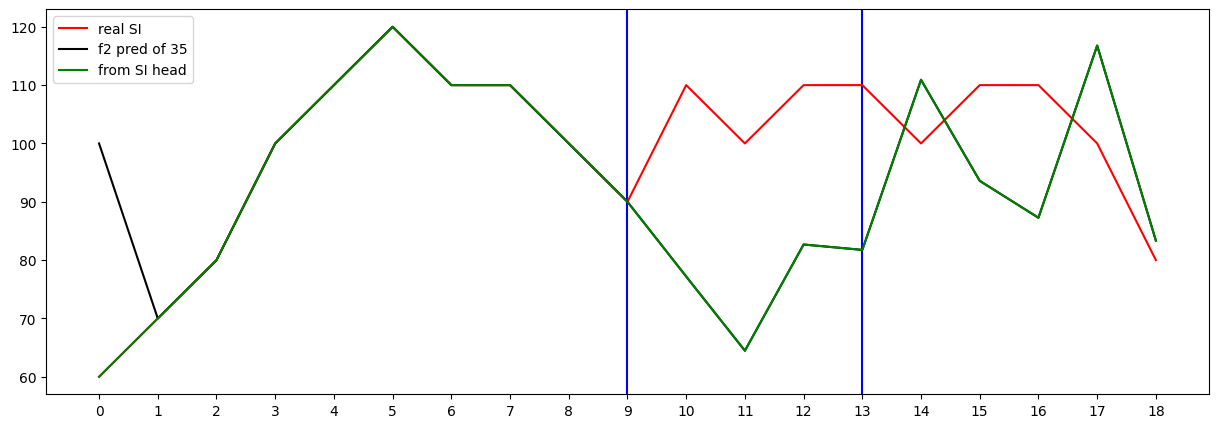

Testing R**2 - (all) - (no inputs):  0.9976856346871401
Testing R**2 - (f2) - SI full (no inputs):  -1.5483644444124596
Testing R**2 - SI head only (no inputs):  -1.5483644444124596
0 ...index R**2 (no inputs):  -1.1465391369477556
1 ...index R**2 (no inputs):  -74.98303642588405
2 ...index R**2 (no inputs):  -1.5483644444124596
3 ...index R**2 (no inputs):  -0.479908660080379
4 ...index R**2 (no inputs):  -17.646387942163752
5 ...index R**2 (no inputs):  -2.820669201750326
6 ...index R**2 (no inputs):  -70.49101031308166
7 ...index R**2 (no inputs):  -39.57362977100161
8 ...index R**2 (no inputs):  -57.09159967754699
9 ...index R**2 (no inputs):  -42.141884552975576
10 ...index R**2 (no inputs):  -14.504332161310492
11 ...index R**2 (no inputs):  -18.193462628182115
12 ...index R**2 (no inputs):  -3.988484390971861
13 ...index R**2 (no inputs):  -4.452474329385071
14 ...index R**2 (no inputs):  -5.314175984900207
15 ...index R**2 (no inputs):  -109.48825829266558
16 ...index R**2 (no 

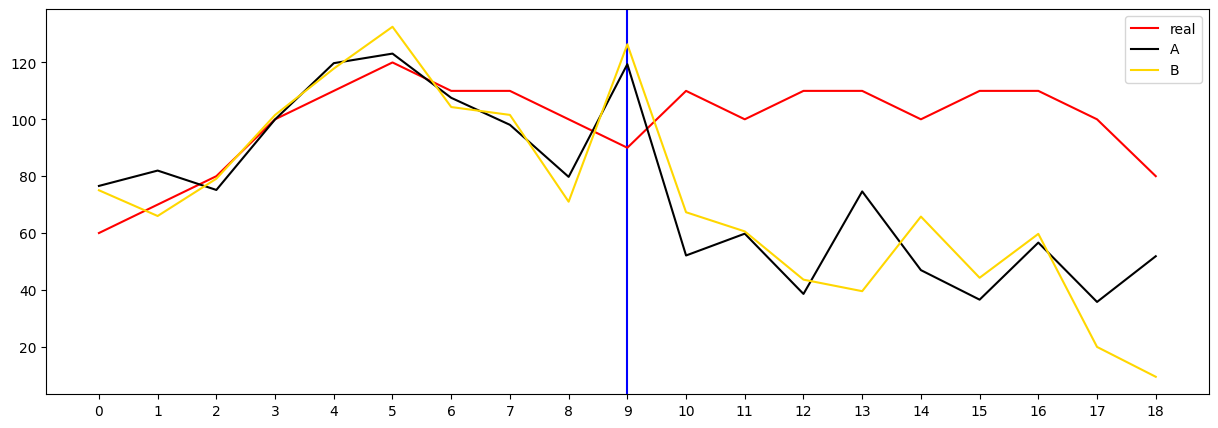

Which prediction is better? (A/B/skip): s


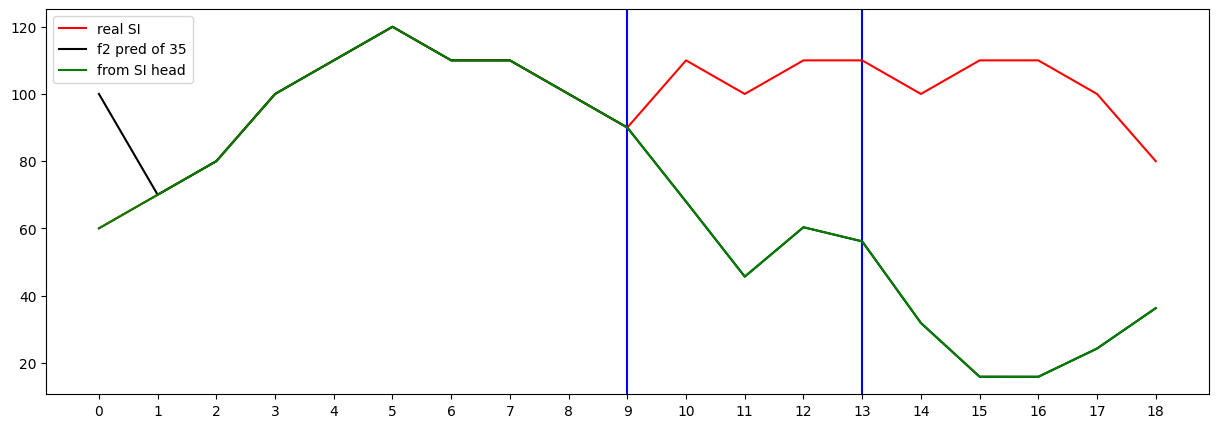

Testing R**2 - (all) - (no inputs):  0.9887065555241958
Testing R**2 - (f2) - SI full (no inputs):  -13.988994198958276
Testing R**2 - SI head only (no inputs):  -13.988994198958276
0 ...index R**2 (no inputs):  -0.6627933828853165
1 ...index R**2 (no inputs):  -102.32041380170926
2 ...index R**2 (no inputs):  -13.988994198958276
3 ...index R**2 (no inputs):  -25.50668558714781
4 ...index R**2 (no inputs):  -77.5066297529649
5 ...index R**2 (no inputs):  -77.55615413397076
6 ...index R**2 (no inputs):  -632.0104346393331
7 ...index R**2 (no inputs):  -181.74920531061417
8 ...index R**2 (no inputs):  -849.2347411977269
9 ...index R**2 (no inputs):  -1294.1728416612161
10 ...index R**2 (no inputs):  -377.4628192231319
11 ...index R**2 (no inputs):  -9.256667950506126
12 ...index R**2 (no inputs):  -42.63827272110278
13 ...index R**2 (no inputs):  -10.30548356503513
14 ...index R**2 (no inputs):  -1.5380568970849025
15 ...index R**2 (no inputs):  -540.020790087097
16 ...index R**2 (no inp

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.341012
Loss_SI: 1.3416931629180908 Loss_all: 1.3344016075134277
===
[50] Train Loss: 0.222435
Loss_SI: 0.5496492385864258 Loss_all: 0.22069799900054932
===


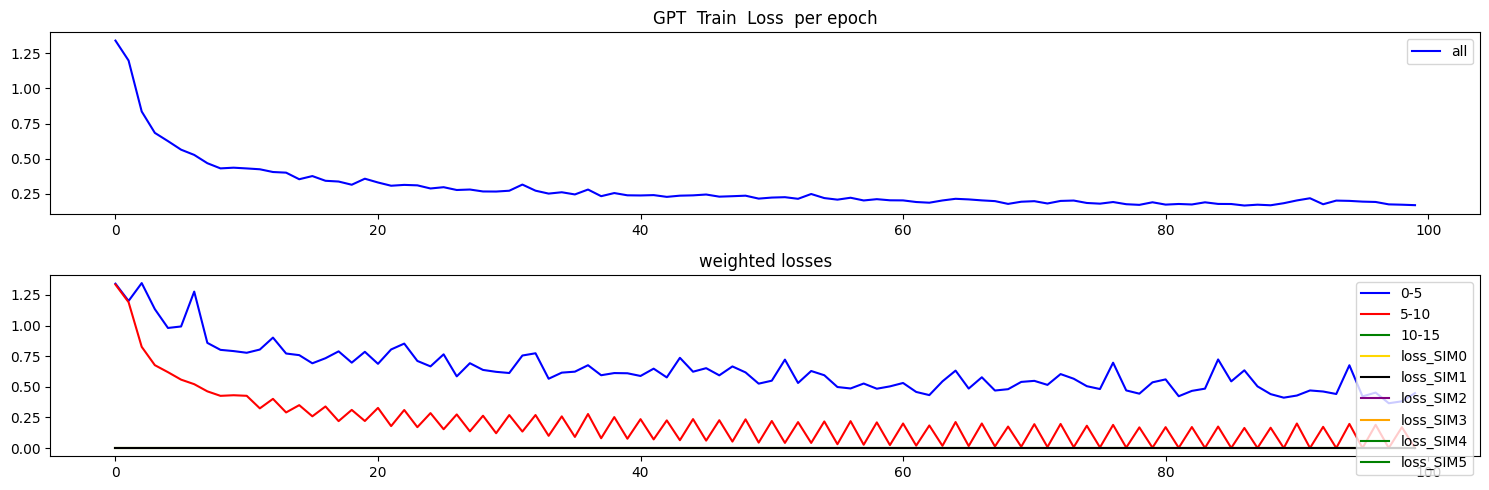

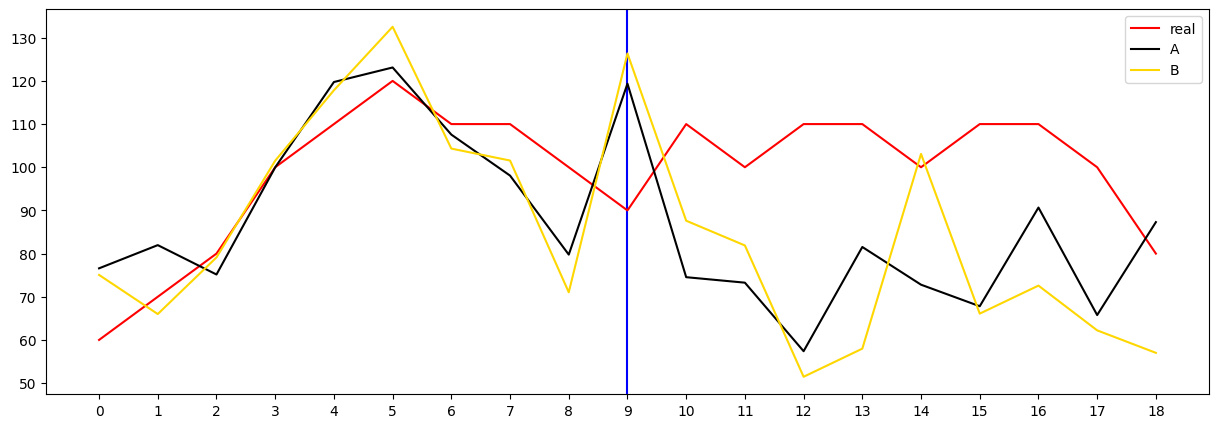

Which prediction is better? (A/B/skip): s


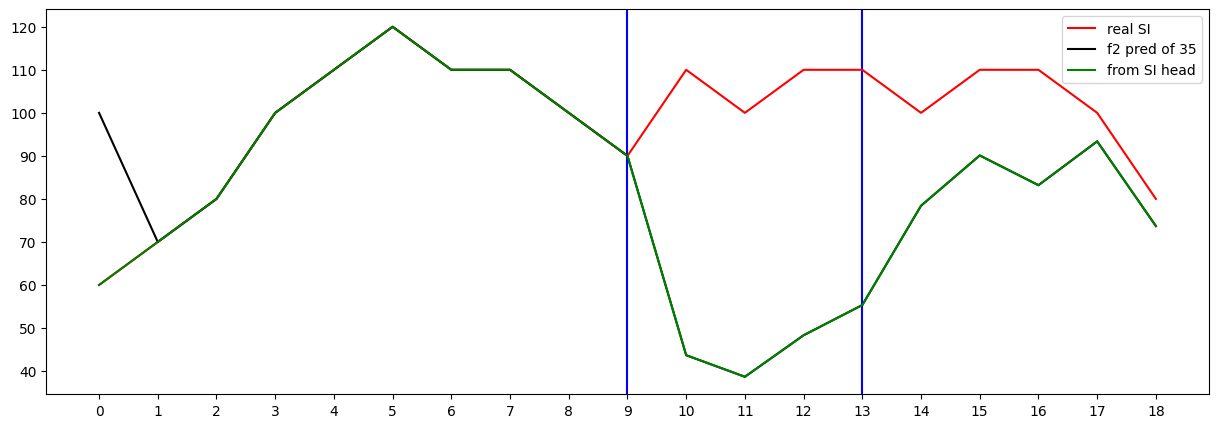

Testing R**2 - (all) - (no inputs):  0.9953625573680995
Testing R**2 - (f2) - SI full (no inputs):  -5.835853645828568
Testing R**2 - SI head only (no inputs):  -5.835853645828568
0 ...index R**2 (no inputs):  -0.27154026154987654
1 ...index R**2 (no inputs):  -63.16798520369599
2 ...index R**2 (no inputs):  -5.835853645828568
3 ...index R**2 (no inputs):  -1.1333790171035494
4 ...index R**2 (no inputs):  -35.40678195834949
5 ...index R**2 (no inputs):  -38.31776691302719
6 ...index R**2 (no inputs):  -125.6517354324265
7 ...index R**2 (no inputs):  -18.964732422005874
8 ...index R**2 (no inputs):  -166.06920803751106
9 ...index R**2 (no inputs):  -113.21111315320012
10 ...index R**2 (no inputs):  -28.870803861332554
11 ...index R**2 (no inputs):  -9.915793739770317
12 ...index R**2 (no inputs):  -1.9531998166080249
13 ...index R**2 (no inputs):  -7.342617767339265
14 ...index R**2 (no inputs):  -3.6387069321759187
15 ...index R**2 (no inputs):  -374.9220002376382
16 ...index R**2 (no 

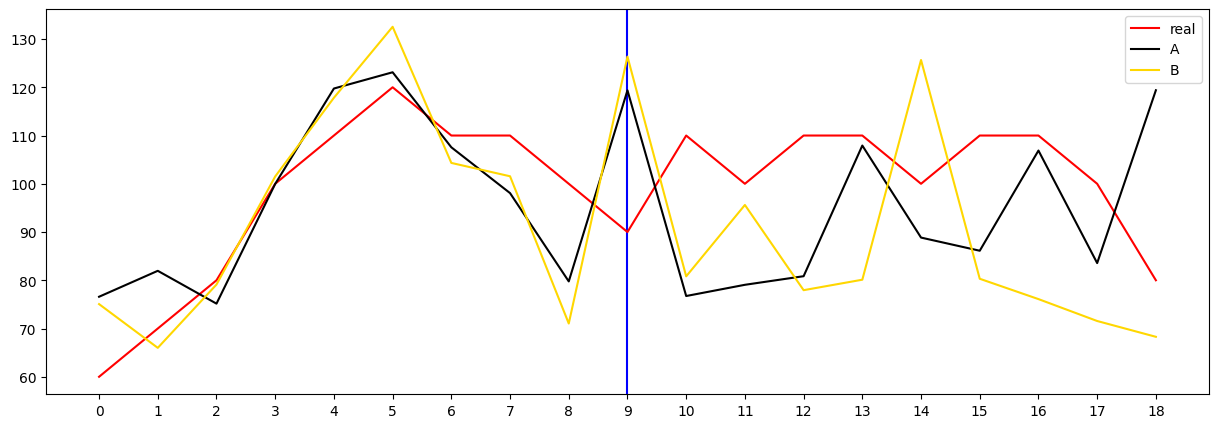

Which prediction is better? (A/B/skip): s


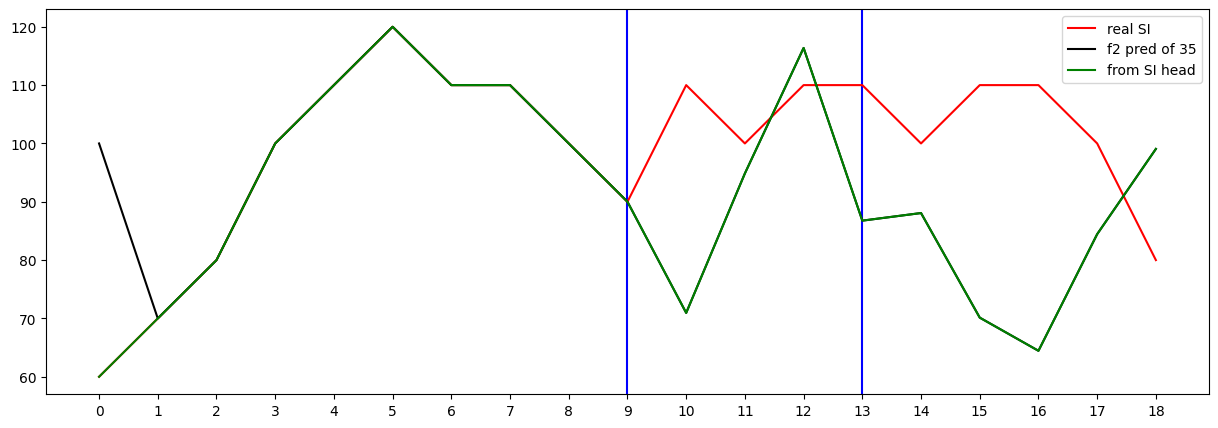

Testing R**2 - (all) - (no inputs):  0.9965621851902481
Testing R**2 - (f2) - SI full (no inputs):  -1.6182628311207408
Testing R**2 - SI head only (no inputs):  -1.6182628311207408
0 ...index R**2 (no inputs):  -4.622098586063839
1 ...index R**2 (no inputs):  -1575.2569811267877
2 ...index R**2 (no inputs):  -1.6182628311207408
3 ...index R**2 (no inputs):  -44.51118252555773
4 ...index R**2 (no inputs):  -236.185765010028
5 ...index R**2 (no inputs):  -1072.2455385682829
6 ...index R**2 (no inputs):  -237.3884412950484
7 ...index R**2 (no inputs):  -171.966092420951
8 ...index R**2 (no inputs):  -509.23809816717295
9 ...index R**2 (no inputs):  -398.6201367675346
10 ...index R**2 (no inputs):  -21.47077903720474
11 ...index R**2 (no inputs):  -3.248031374871866
12 ...index R**2 (no inputs):  -24.62663580007374
13 ...index R**2 (no inputs):  -43.821103587237964
14 ...index R**2 (no inputs):  -181.46189504941958
15 ...index R**2 (no inputs):  -1598.7128506114836
16 ...index R**2 (no in

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



[0] Train Loss: 1.327097
Loss_SI: 1.4387892484664917 Loss_all: 1.3205026388168335
===
[50] Train Loss: 0.252006
Loss_SI: 0.5105257034301758 Loss_all: 0.2503477931022644
===


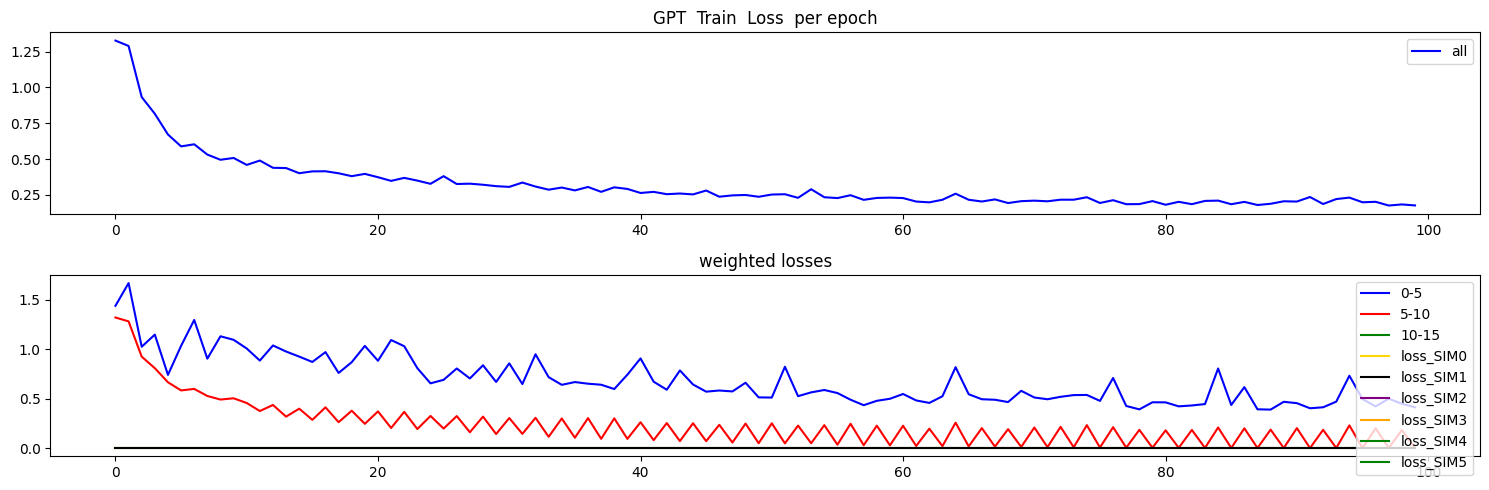

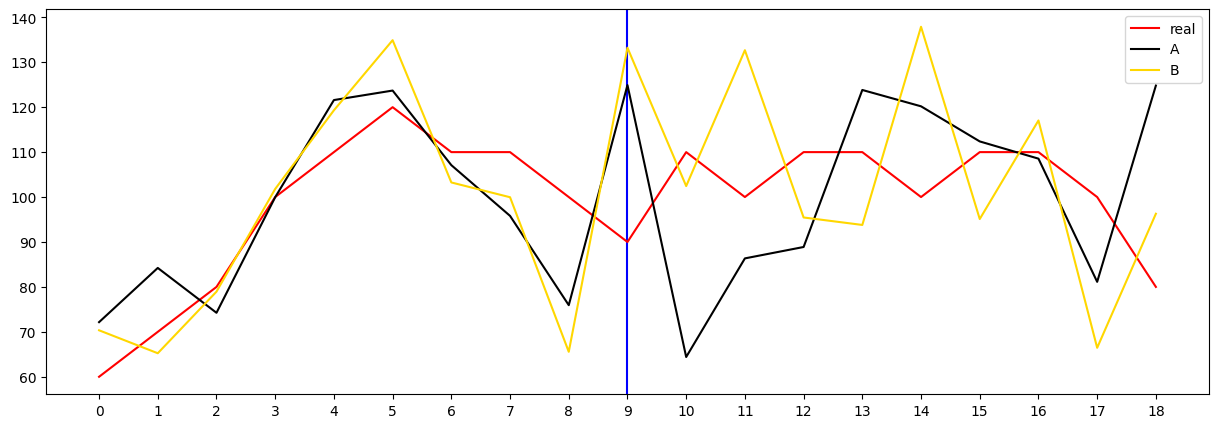

Which prediction is better? (A/B/skip): b
Saved preference.


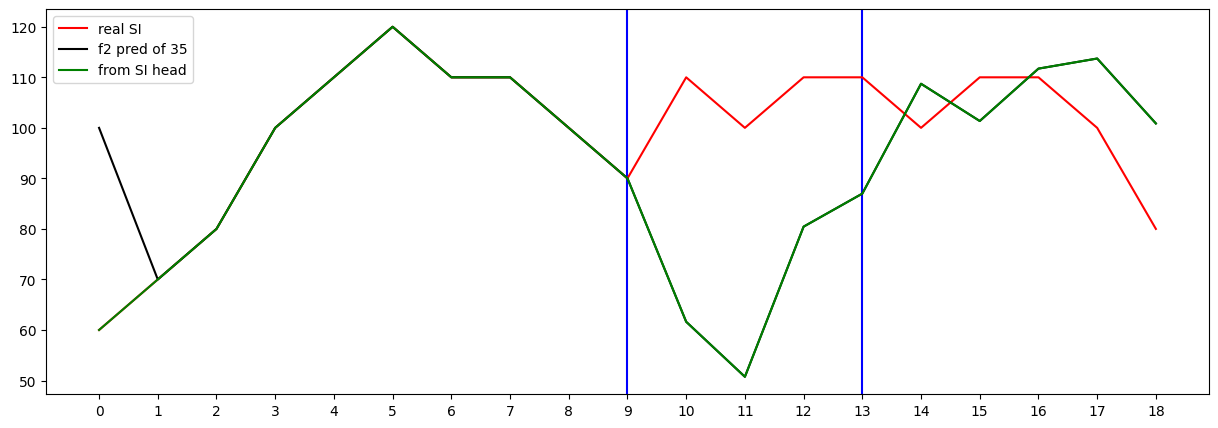

Testing R**2 - (all) - (no inputs):  0.9966564573687516
Testing R**2 - (f2) - SI full (no inputs):  -2.841014688680188
Testing R**2 - SI head only (no inputs):  -2.841014688680188
0 ...index R**2 (no inputs):  -3.1965174835935173
1 ...index R**2 (no inputs):  -254.25393717954228
2 ...index R**2 (no inputs):  -2.841014688680188
3 ...index R**2 (no inputs):  -0.9262372654952034
4 ...index R**2 (no inputs):  -71.06319446638305
5 ...index R**2 (no inputs):  -57.511263197968916
6 ...index R**2 (no inputs):  -90.87084567405982
7 ...index R**2 (no inputs):  -18.19164283005218
8 ...index R**2 (no inputs):  -66.56184471959058
9 ...index R**2 (no inputs):  -84.61831792945492
10 ...index R**2 (no inputs):  -35.67746627347627
11 ...index R**2 (no inputs):  -83.68571147348341
12 ...index R**2 (no inputs):  -16.866363528119727
13 ...index R**2 (no inputs):  -9.627554070593963
14 ...index R**2 (no inputs):  -6.060002331855694
15 ...index R**2 (no inputs):  -392.2152418949196
16 ...index R**2 (no inpu

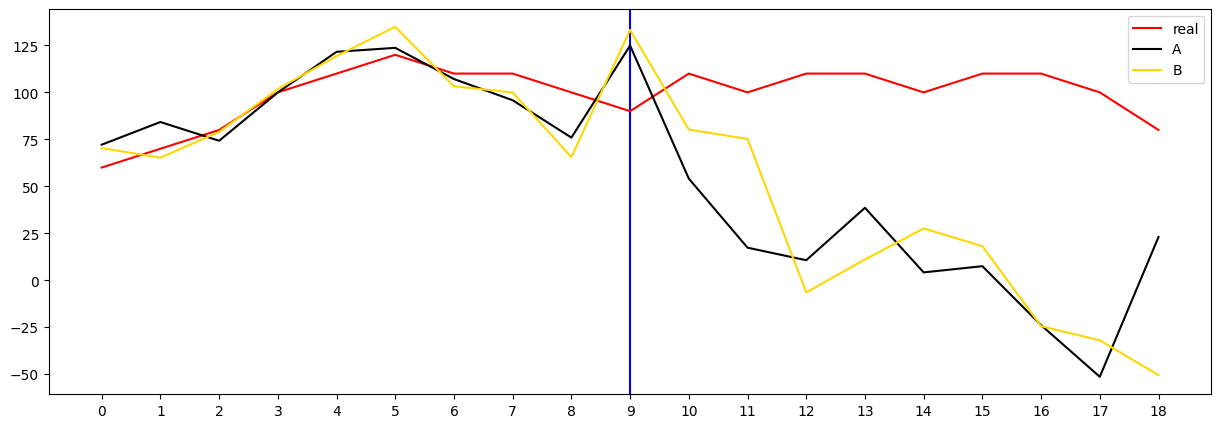

Which prediction is better? (A/B/skip): b
Saved preference.


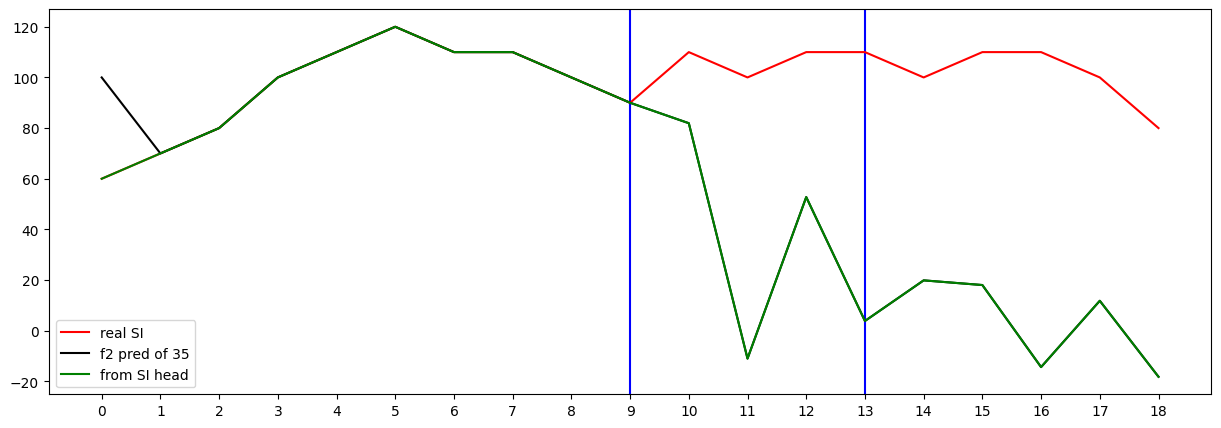

Testing R**2 - (all) - (no inputs):  0.9828899649717182
Testing R**2 - (f2) - SI full (no inputs):  -27.825017254732007
Testing R**2 - SI head only (no inputs):  -27.825017254732007
0 ...index R**2 (no inputs):  -1.9690718295846006
1 ...index R**2 (no inputs):  -25.655304867293722
2 ...index R**2 (no inputs):  -27.825017254732007
3 ...index R**2 (no inputs):  -101.22605601187145
4 ...index R**2 (no inputs):  -1249.474010929354
5 ...index R**2 (no inputs):  -1205.6967892520563
6 ...index R**2 (no inputs):  -2609.5294093095317
7 ...index R**2 (no inputs):  -4690.541533934048
8 ...index R**2 (no inputs):  -1289.7582498166094
9 ...index R**2 (no inputs):  -4973.950653351827
10 ...index R**2 (no inputs):  -540.4993309149044
11 ...index R**2 (no inputs):  -68.74867520307069
12 ...index R**2 (no inputs):  -254.81148939625282
13 ...index R**2 (no inputs):  -99.89615116879378
14 ...index R**2 (no inputs):  -530.0054976626631
15 ...index R**2 (no inputs):  -22368.88472492726
16 ...index R**2 (no

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )



[0] Train Loss: 1.386811
Loss_SI: 1.320412516593933 Loss_all: 1.3802484273910522
===
[50] Train Loss: 0.237145
Loss_SI: 0.61187344789505 Loss_all: 0.23545673489570618
===


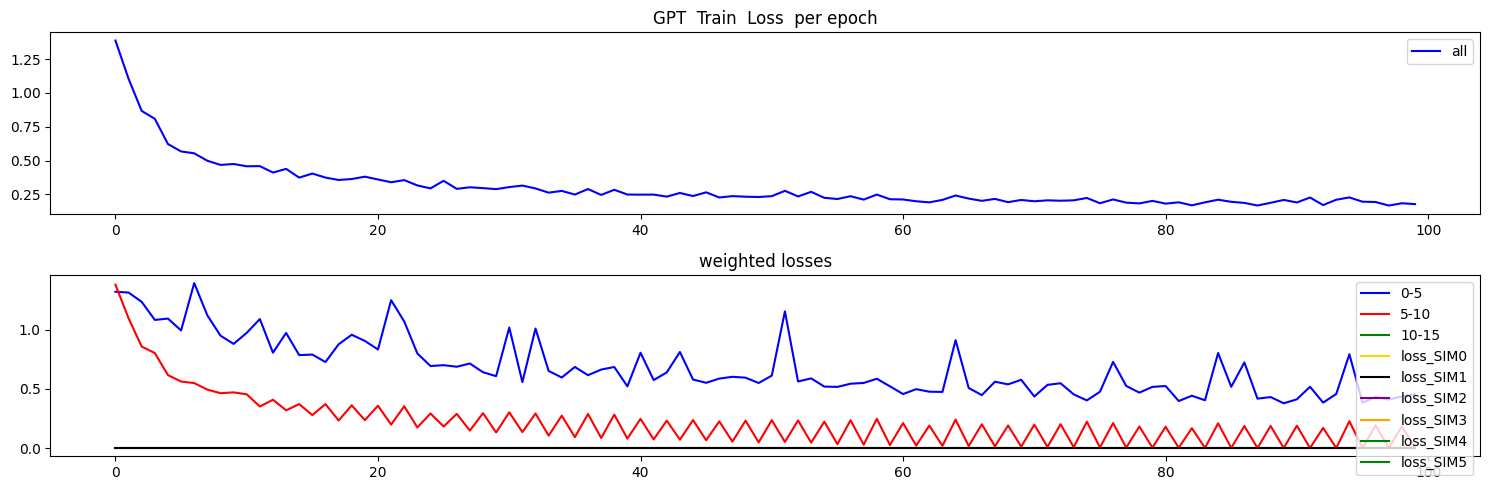

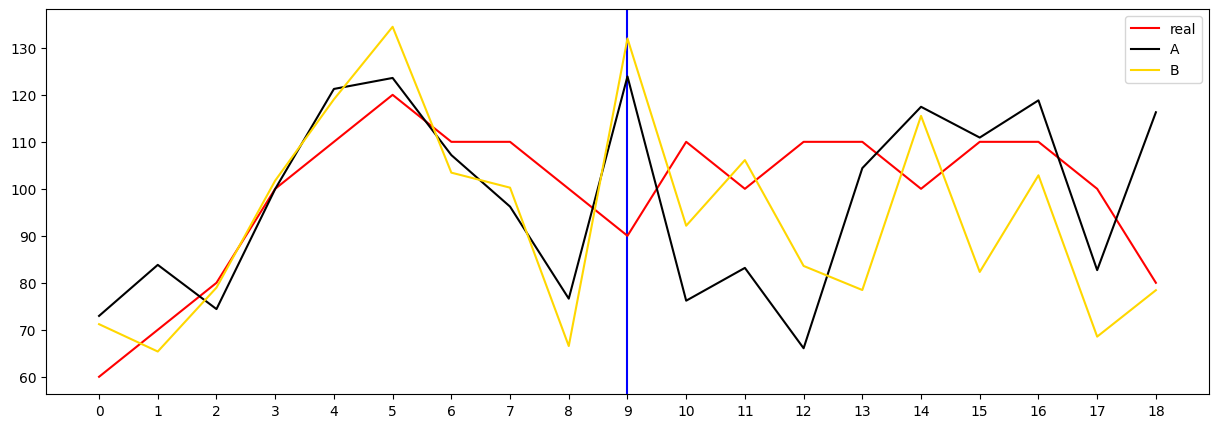

Which prediction is better? (A/B/skip): b
Saved preference.


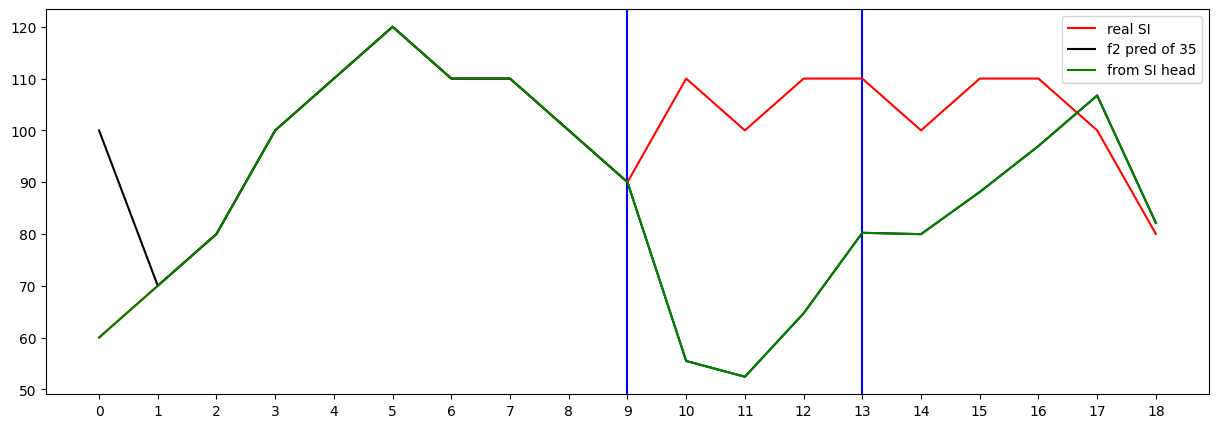

Testing R**2 - (all) - (no inputs):  0.9964873848784104
Testing R**2 - (f2) - SI full (no inputs):  -3.3881783901463596
Testing R**2 - SI head only (no inputs):  -3.3881783901463596
0 ...index R**2 (no inputs):  -0.23684340879249755
1 ...index R**2 (no inputs):  -197.37425068175904
2 ...index R**2 (no inputs):  -3.3881783901463596
3 ...index R**2 (no inputs):  -1.6359122746372883
4 ...index R**2 (no inputs):  -56.115329793050414
5 ...index R**2 (no inputs):  -31.123634177567013
6 ...index R**2 (no inputs):  -257.10044349734096
7 ...index R**2 (no inputs):  -178.23596954613166
8 ...index R**2 (no inputs):  -78.25672670042196
9 ...index R**2 (no inputs):  -108.92949614271932
10 ...index R**2 (no inputs):  -48.57242440431709
11 ...index R**2 (no inputs):  -86.88449680888343
12 ...index R**2 (no inputs):  -4.140241304884218
13 ...index R**2 (no inputs):  -4.3001426864354935
14 ...index R**2 (no inputs):  -14.627221176625731
15 ...index R**2 (no inputs):  -735.757635811595
16 ...index R**2 

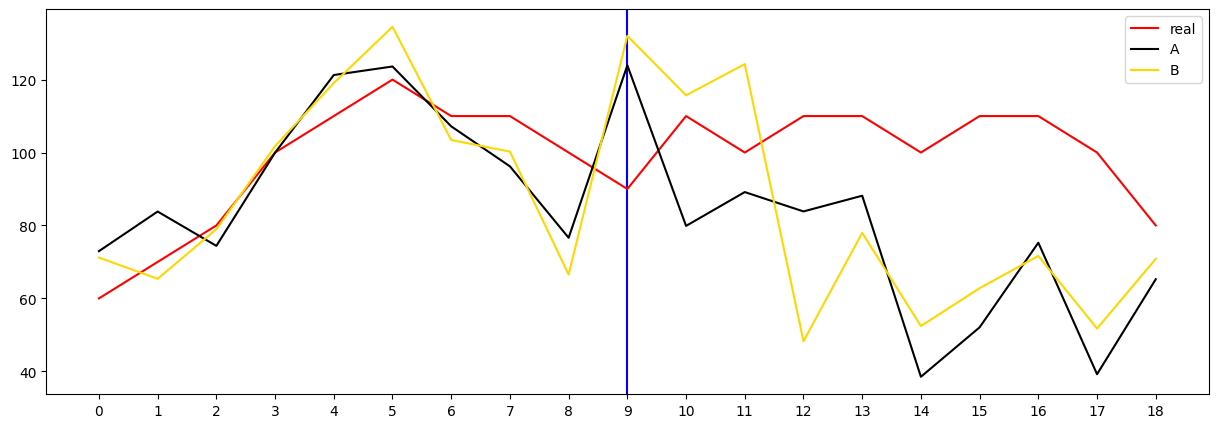

Which prediction is better? (A/B/skip): s


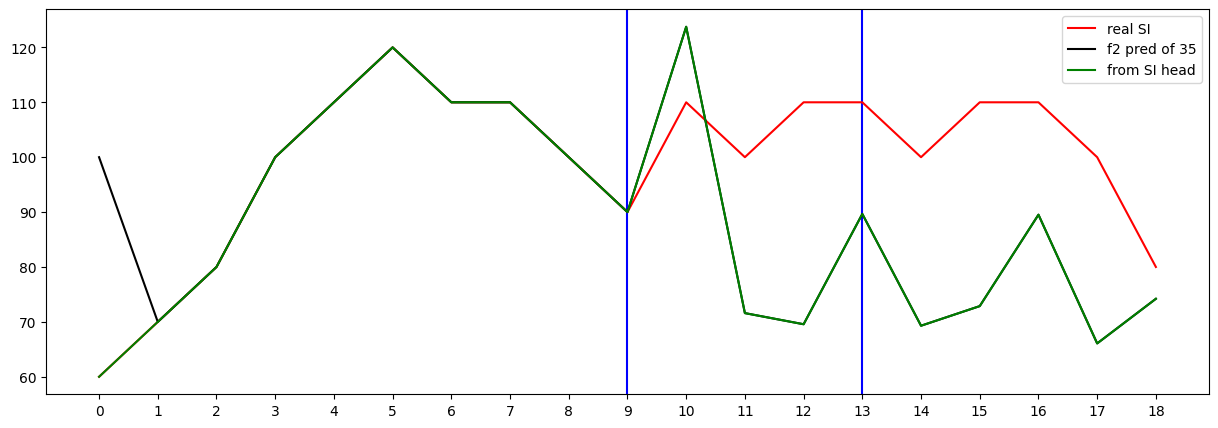

Testing R**2 - (all) - (no inputs):  0.9917930165098843
Testing R**2 - (f2) - SI full (no inputs):  -2.1079778149640505
Testing R**2 - SI head only (no inputs):  -2.1079778149640505
0 ...index R**2 (no inputs):  -4.59975217032019
1 ...index R**2 (no inputs):  -1665.7005138690638
2 ...index R**2 (no inputs):  -2.1079778149640505
3 ...index R**2 (no inputs):  -129.25248942331552
4 ...index R**2 (no inputs):  -1456.0381234535223
5 ...index R**2 (no inputs):  -3324.4723166198196
6 ...index R**2 (no inputs):  -3012.0191194269732
7 ...index R**2 (no inputs):  -10123.071633163683
8 ...index R**2 (no inputs):  -1432.7582835495675
9 ...index R**2 (no inputs):  -24331.523115187636
10 ...index R**2 (no inputs):  -48.728680556859956
11 ...index R**2 (no inputs):  -180.0475205072359
12 ...index R**2 (no inputs):  -4690.614917647441
13 ...index R**2 (no inputs):  -10.924090558208281
14 ...index R**2 (no inputs):  -188.98446797935034
15 ...index R**2 (no inputs):  -70704.85009395676
16 ...index R**2 

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




## Run 3


In [43]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.282899
Loss_SI: 1.3359688520431519 Loss_all: 1.2762153148651123
===
[50] Train Loss: 0.209386
Loss_SI: 1.053301215171814 Loss_all: 0.20669490098953247
===


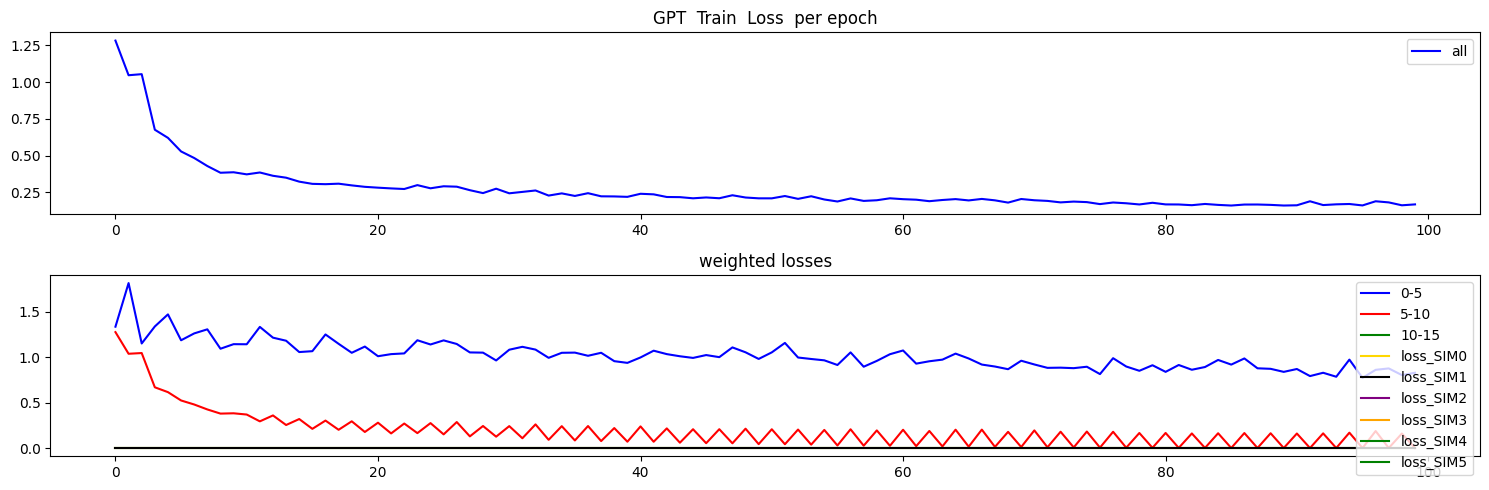

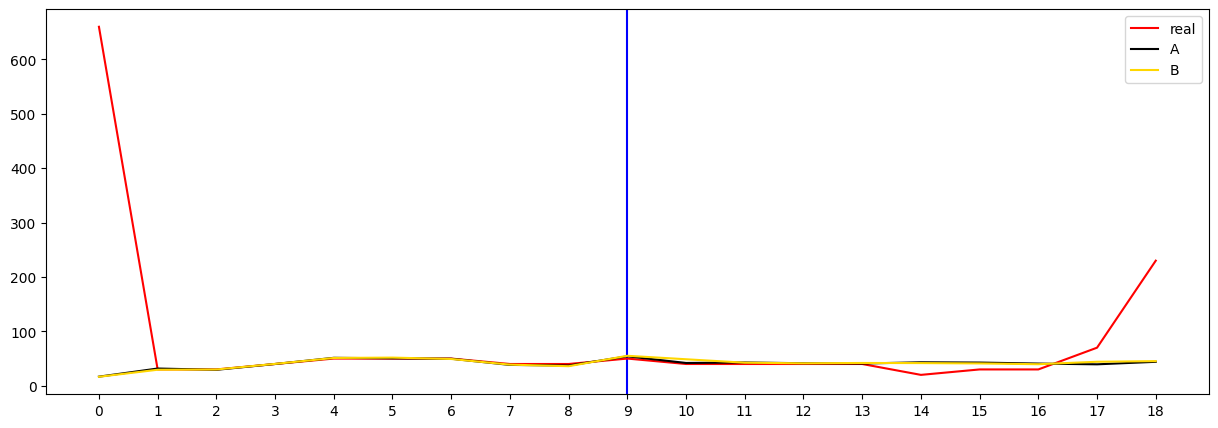

Which prediction is better? (A/B/skip): s


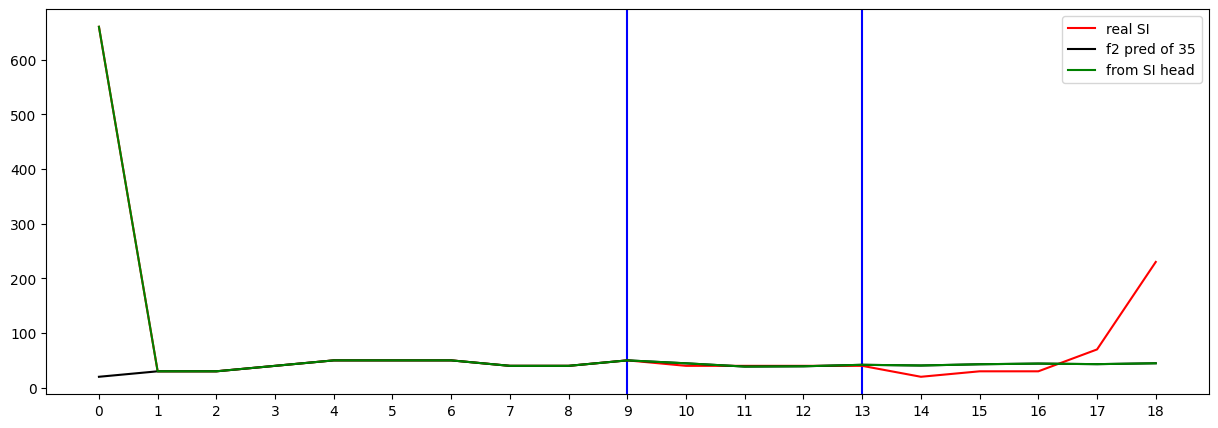

Testing R**2 - (all) - (no inputs):  0.9171083514381901
Testing R**2 - (f2) - SI full (no inputs):  -0.1826415566336752
Testing R**2 - SI head only (no inputs):  -0.1826415566336752
0 ...index R**2 (no inputs):  -0.4547001088903917
1 ...index R**2 (no inputs):  -41.47570747926294
2 ...index R**2 (no inputs):  -0.1826415566336752
3 ...index R**2 (no inputs):  -11.793377582615205
4 ...index R**2 (no inputs):  -25.137188877825576
5 ...index R**2 (no inputs):  -6.05516861657762
6 ...index R**2 (no inputs):  -19.32199041868161
7 ...index R**2 (no inputs):  -0.43594302774291327
8 ...index R**2 (no inputs):  -37.80575656304034
9 ...index R**2 (no inputs):  -15.895883998998649
10 ...index R**2 (no inputs):  -131.31077714300386
11 ...index R**2 (no inputs):  -84.82184581634034
12 ...index R**2 (no inputs):  -53.4526395527943
13 ...index R**2 (no inputs):  -54.244176529649536
14 ...index R**2 (no inputs):  -33.382111863399295
15 ...index R**2 (no inputs):  -26.462045379210107
16 ...index R**2 (n

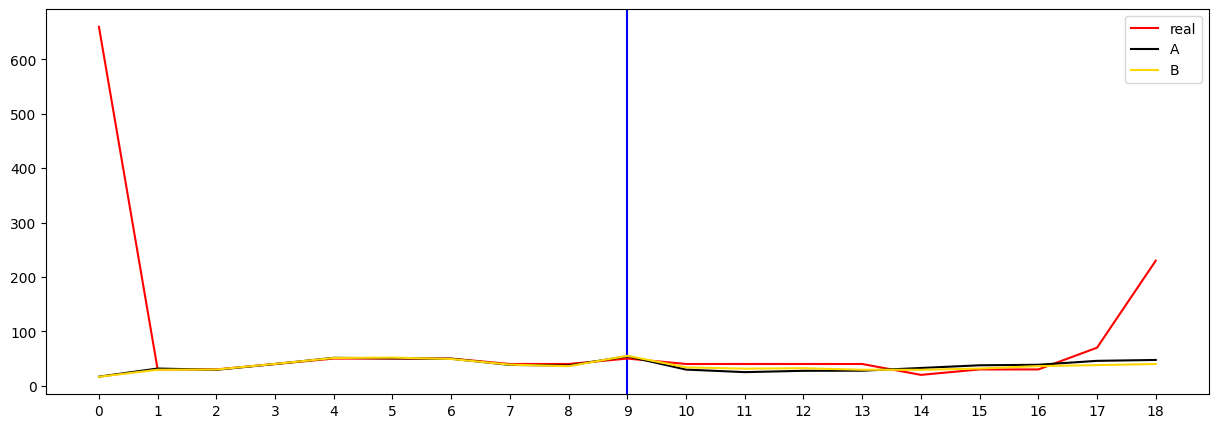

Which prediction is better? (A/B/skip): s


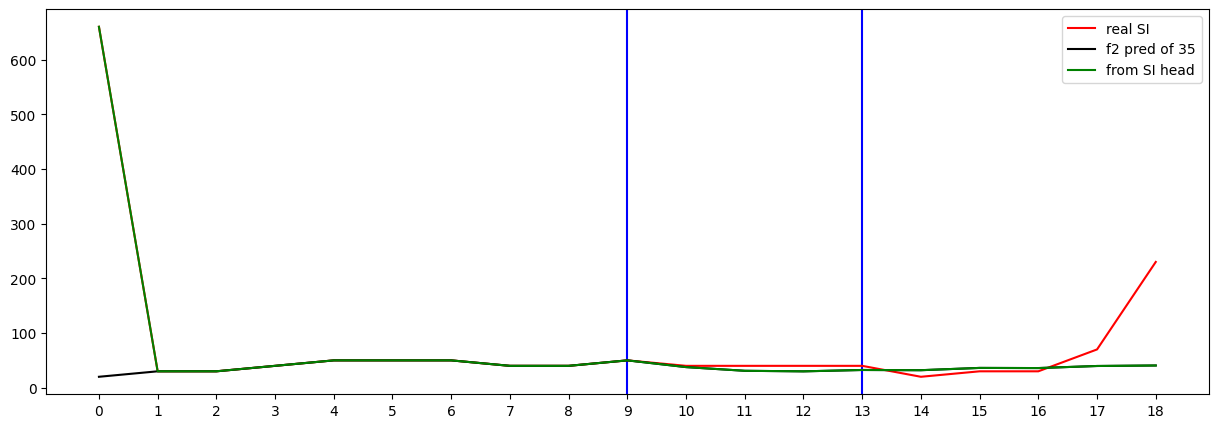

Testing R**2 - (all) - (no inputs):  0.9160263748948593
Testing R**2 - (f2) - SI full (no inputs):  -0.20083262035682226
Testing R**2 - SI head only (no inputs):  -0.20083262035682226
0 ...index R**2 (no inputs):  -0.028964059041412193
1 ...index R**2 (no inputs):  -1023.5194472532669
2 ...index R**2 (no inputs):  -0.20083262035682226
3 ...index R**2 (no inputs):  -17.4286288175641
4 ...index R**2 (no inputs):  -305.01184139729514
5 ...index R**2 (no inputs):  -236.67164636783562
6 ...index R**2 (no inputs):  -71.45972954479512
7 ...index R**2 (no inputs):  -3.5657775410766064
8 ...index R**2 (no inputs):  -909.8193122133614
9 ...index R**2 (no inputs):  -687.847740509328
10 ...index R**2 (no inputs):  -2644.0478802584394
11 ...index R**2 (no inputs):  -1960.1311209823825
12 ...index R**2 (no inputs):  -1.3445021159316837
13 ...index R**2 (no inputs):  -87.82400387449383
14 ...index R**2 (no inputs):  -181.60099424245314
15 ...index R**2 (no inputs):  -96.09075896652249
16 ...index R**

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.330625
Loss_SI: 1.3264840841293335 Loss_all: 1.3240184783935547
===
[50] Train Loss: 0.210008
Loss_SI: 0.5757104754447937 Loss_all: 0.2075858861207962
===


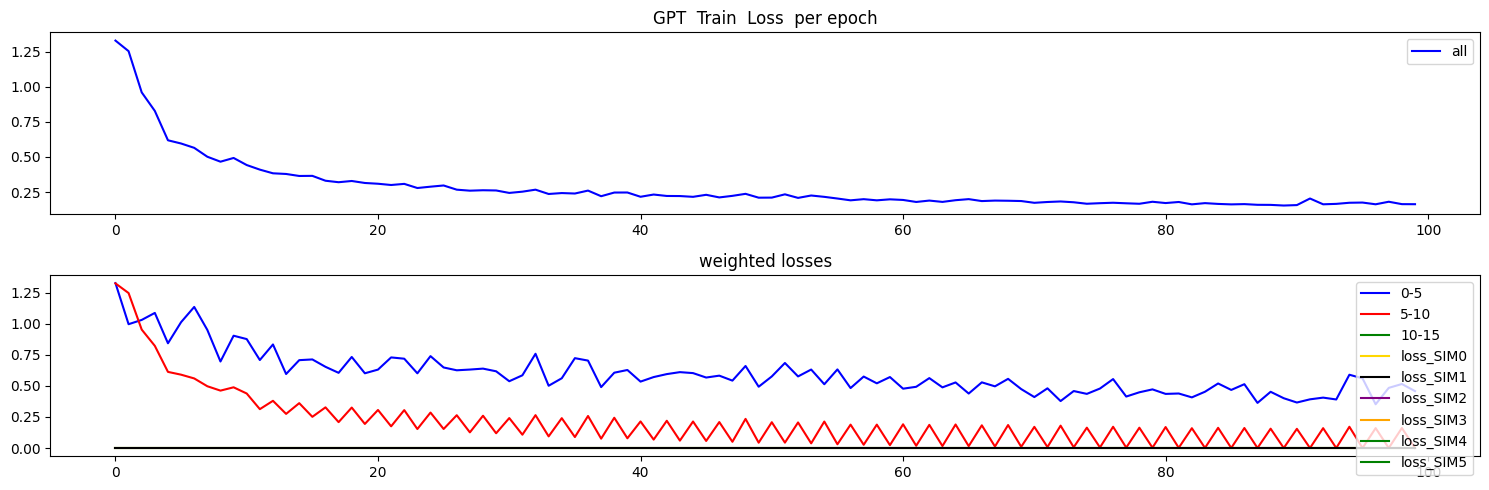

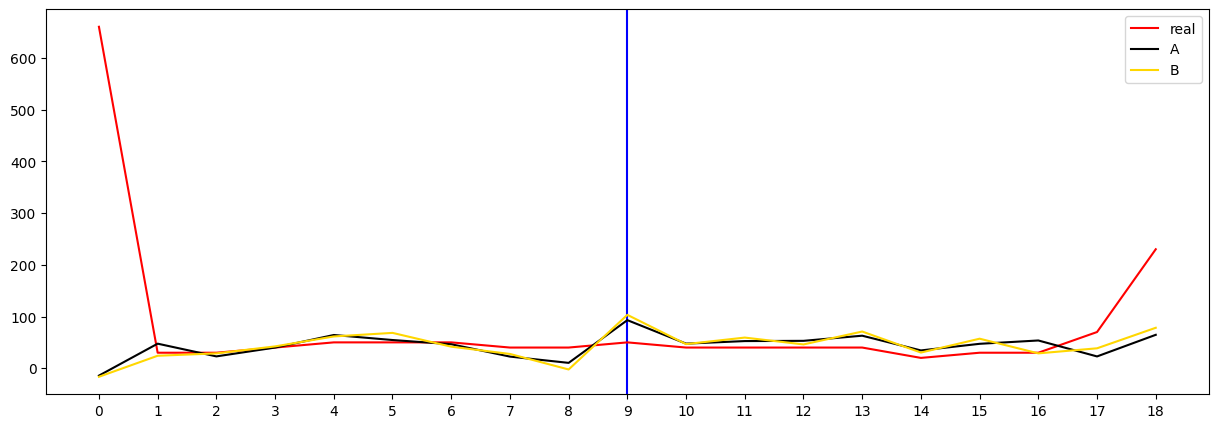

Which prediction is better? (A/B/skip): s


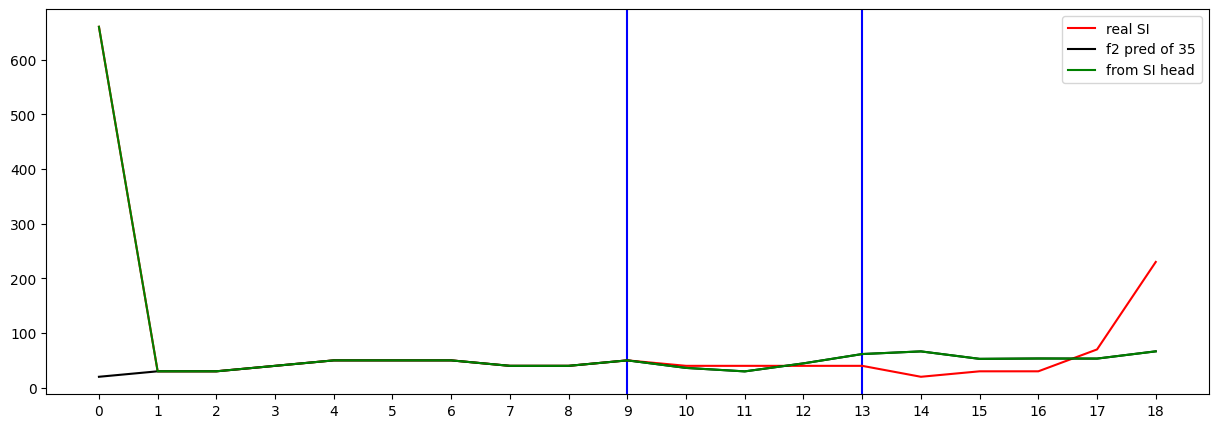

Testing R**2 - (all) - (no inputs):  0.9223561477093625
Testing R**2 - (f2) - SI full (no inputs):  -0.10418393627827727
Testing R**2 - SI head only (no inputs):  -0.10418393627827727
0 ...index R**2 (no inputs):  -0.2161874099652159
1 ...index R**2 (no inputs):  -99.80942750368231
2 ...index R**2 (no inputs):  -0.10418393627827727
3 ...index R**2 (no inputs):  -10.053362919685295
4 ...index R**2 (no inputs):  -39.68484684875531
5 ...index R**2 (no inputs):  -30.833713197660064
6 ...index R**2 (no inputs):  -18.53609002714446
7 ...index R**2 (no inputs):  -1.6787977014550952
8 ...index R**2 (no inputs):  -60.70514129207544
9 ...index R**2 (no inputs):  -86.09148818981504
10 ...index R**2 (no inputs):  -90.310568202618
11 ...index R**2 (no inputs):  -49.31637789728705
12 ...index R**2 (no inputs):  -49.44200395460371
13 ...index R**2 (no inputs):  -62.533890154559074
14 ...index R**2 (no inputs):  -46.132740041894934
15 ...index R**2 (no inputs):  -24.220865021639653
16 ...index R**2 (n

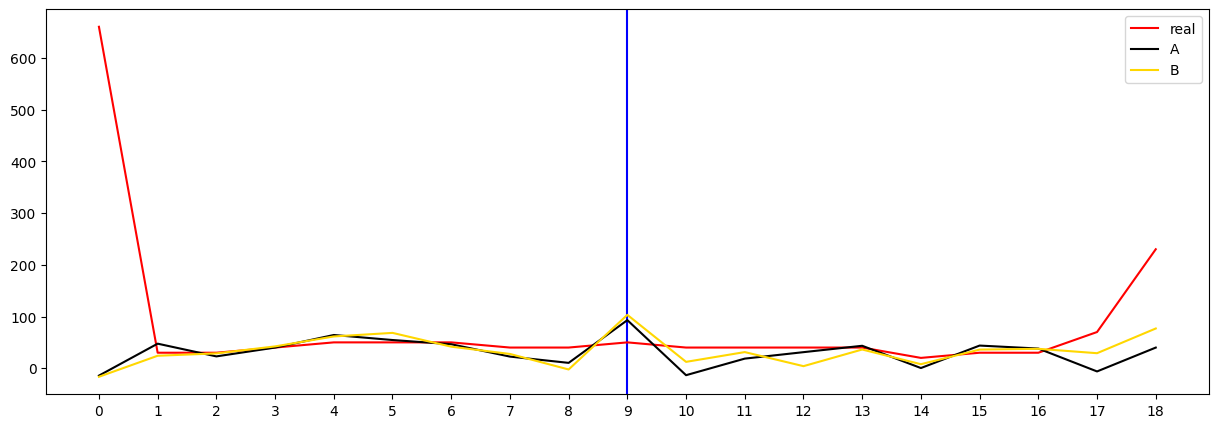

Which prediction is better? (A/B/skip): s


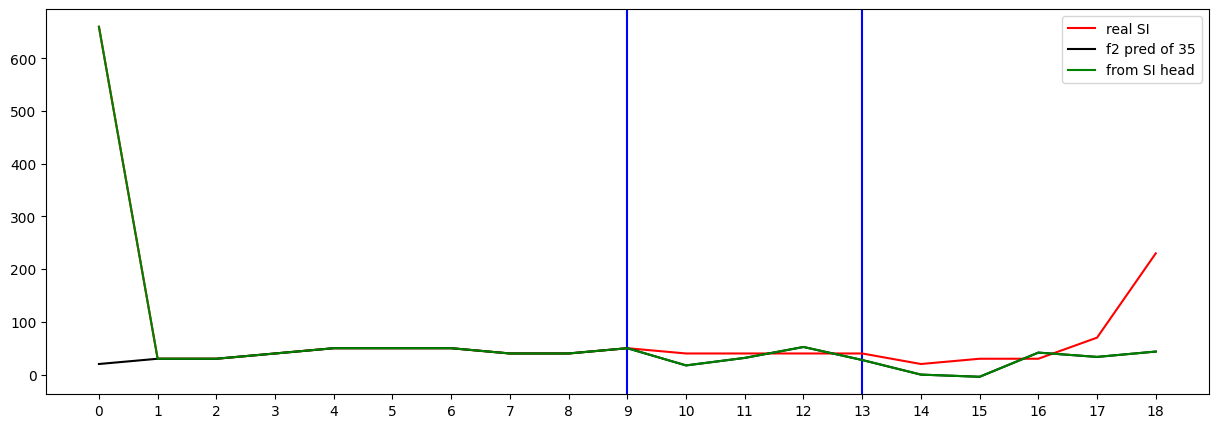

Testing R**2 - (all) - (no inputs):  0.9158818860469913
Testing R**2 - (f2) - SI full (no inputs):  -0.2032413035993592
Testing R**2 - SI head only (no inputs):  -0.2032413035993592
0 ...index R**2 (no inputs):  -0.25633140930932363
1 ...index R**2 (no inputs):  -48.83363389005495
2 ...index R**2 (no inputs):  -0.2032413035993592
3 ...index R**2 (no inputs):  -19.93307796961919
4 ...index R**2 (no inputs):  -186.67114249037246
5 ...index R**2 (no inputs):  -61.94078855794769
6 ...index R**2 (no inputs):  -25.677050442069767
7 ...index R**2 (no inputs):  -1.8094922954378494
8 ...index R**2 (no inputs):  -231.2566666224124
9 ...index R**2 (no inputs):  -1117.194296039239
10 ...index R**2 (no inputs):  -2151.805897286628
11 ...index R**2 (no inputs):  -939.6157488420719
12 ...index R**2 (no inputs):  -8.790893008173699
13 ...index R**2 (no inputs):  -114.94661146049883
14 ...index R**2 (no inputs):  -30.08664409590564
15 ...index R**2 (no inputs):  -156.8634170438587
16 ...index R**2 (no 

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )




[0] Train Loss: 1.323005
Loss_SI: 1.035249948501587 Loss_all: 1.3164045810699463
===
[50] Train Loss: 0.239454
Loss_SI: 0.6937771439552307 Loss_all: 0.23693782091140747
===


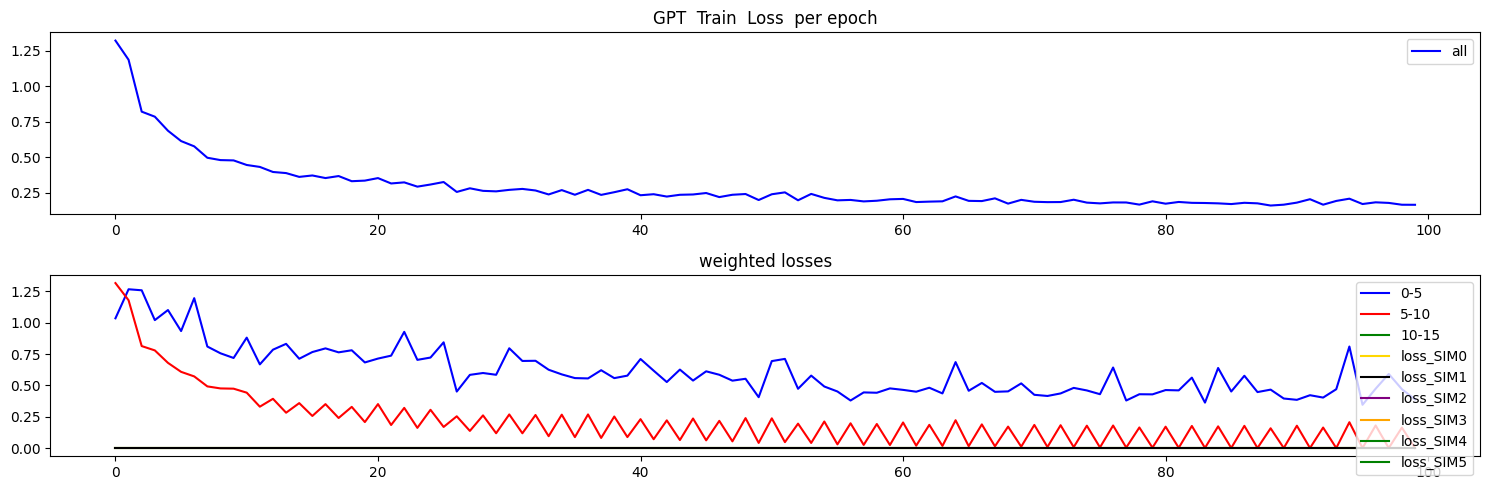

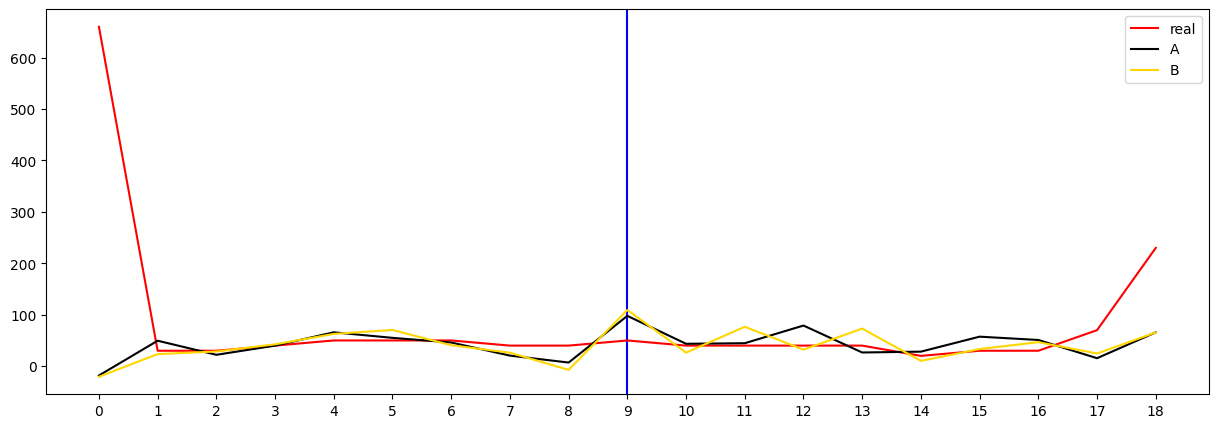

Which prediction is better? (A/B/skip): s


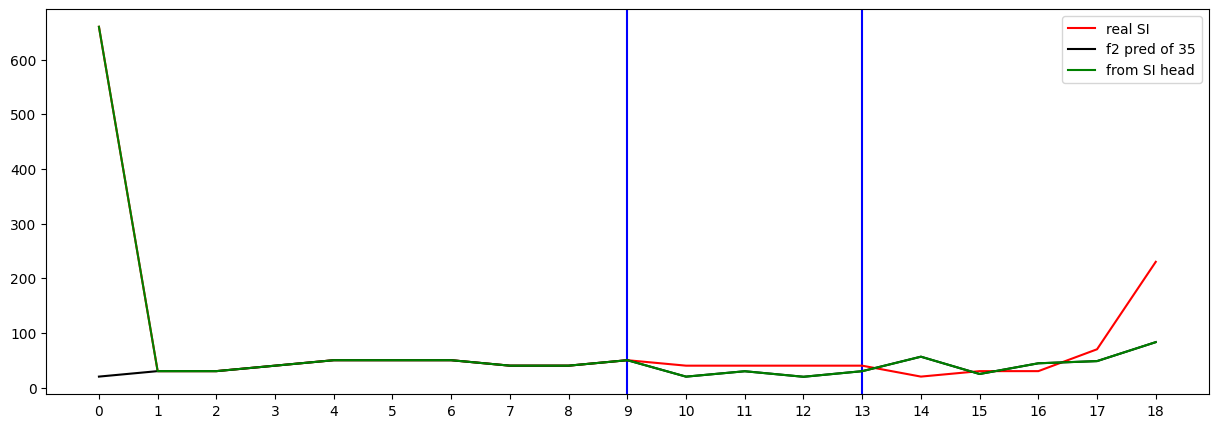

Testing R**2 - (all) - (no inputs):  0.9261478179899543
Testing R**2 - (f2) - SI full (no inputs):  -0.049572770080601014
Testing R**2 - SI head only (no inputs):  -0.049572770080601014
0 ...index R**2 (no inputs):  -0.10939393820322785
1 ...index R**2 (no inputs):  -44.65356028451426
2 ...index R**2 (no inputs):  -0.049572770080601014
3 ...index R**2 (no inputs):  -10.149833511654956
4 ...index R**2 (no inputs):  -27.34430712640184
5 ...index R**2 (no inputs):  -8.536494703716276
6 ...index R**2 (no inputs):  -24.470252445183096
7 ...index R**2 (no inputs):  -2.6716731451354723
8 ...index R**2 (no inputs):  -67.45083906170683
9 ...index R**2 (no inputs):  -12.827671840027827
10 ...index R**2 (no inputs):  -71.56452909801784
11 ...index R**2 (no inputs):  -214.13591133635296
12 ...index R**2 (no inputs):  -35.19532555176594
13 ...index R**2 (no inputs):  -63.09962332780859
14 ...index R**2 (no inputs):  -35.32694694125964
15 ...index R**2 (no inputs):  -18.614314575161014
16 ...index R

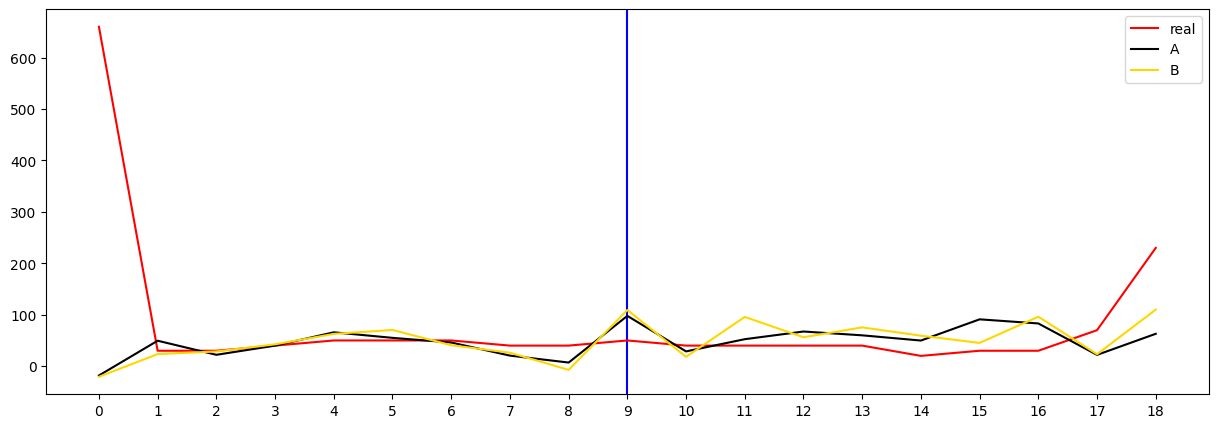

Which prediction is better? (A/B/skip): s


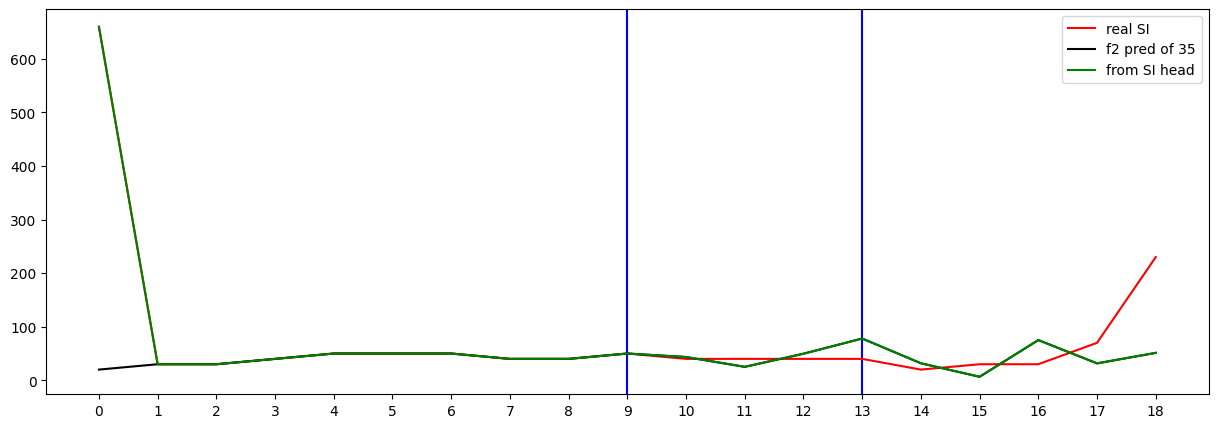

Testing R**2 - (all) - (no inputs):  0.9162168198696694
Testing R**2 - (f2) - SI full (no inputs):  -0.1805310430904694
Testing R**2 - SI head only (no inputs):  -0.1805310430904694
0 ...index R**2 (no inputs):  -0.10597578215855141
1 ...index R**2 (no inputs):  -144.0830246692649
2 ...index R**2 (no inputs):  -0.1805310430904694
3 ...index R**2 (no inputs):  -43.98154791080718
4 ...index R**2 (no inputs):  -329.6053906228197
5 ...index R**2 (no inputs):  -20.826795118396735
6 ...index R**2 (no inputs):  -6.525148367820604
7 ...index R**2 (no inputs):  -6.146706109959338
8 ...index R**2 (no inputs):  -345.8493691940137
9 ...index R**2 (no inputs):  -980.6342356846556
10 ...index R**2 (no inputs):  -4740.34575066894
11 ...index R**2 (no inputs):  -9760.683567430144
12 ...index R**2 (no inputs):  -68.48575969242027
13 ...index R**2 (no inputs):  -160.86832398078917
14 ...index R**2 (no inputs):  -10.598444265065208
15 ...index R**2 (no inputs):  -81.33512652816601
16 ...index R**2 (no in

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



[0] Train Loss: 1.332556
Loss_SI: 1.3763121366500854 Loss_all: 1.3260465860366821
===
[50] Train Loss: 0.252957
Loss_SI: 0.5573101043701172 Loss_all: 0.2504265308380127
===


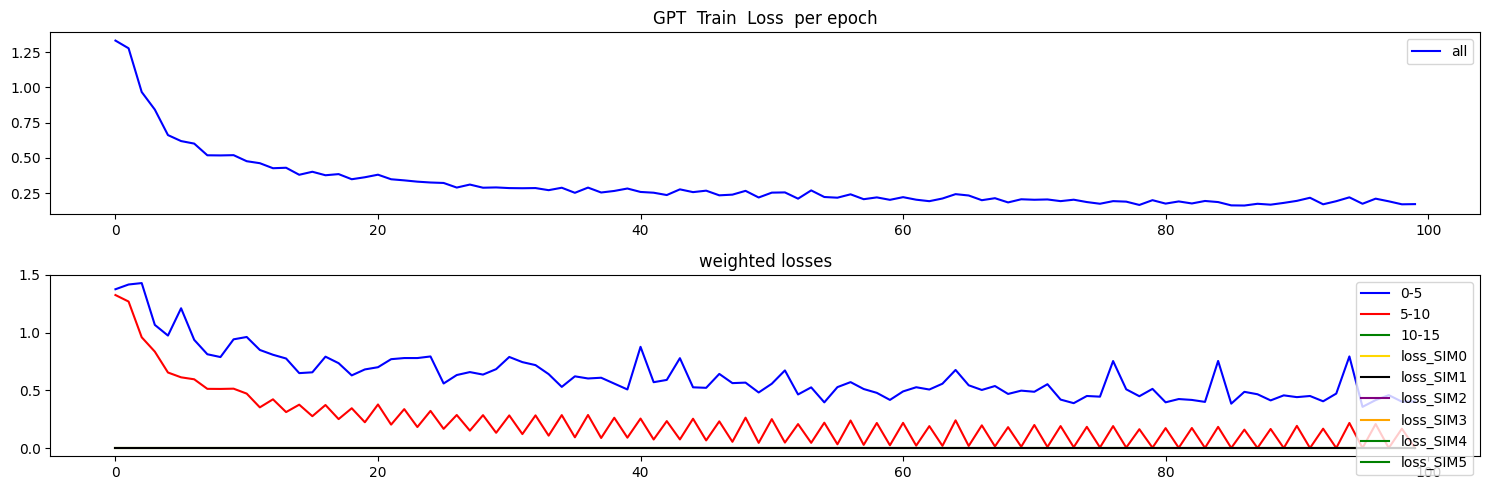

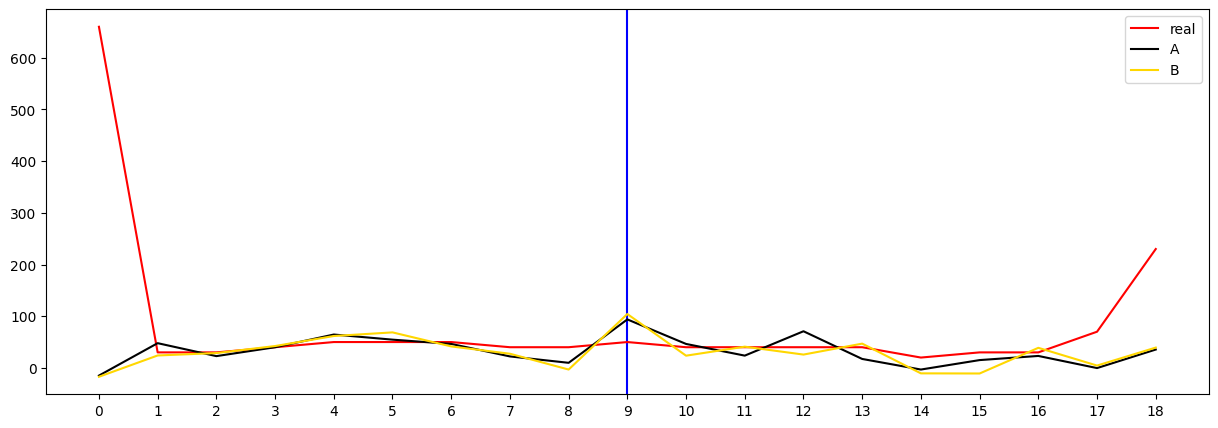

Which prediction is better? (A/B/skip): s


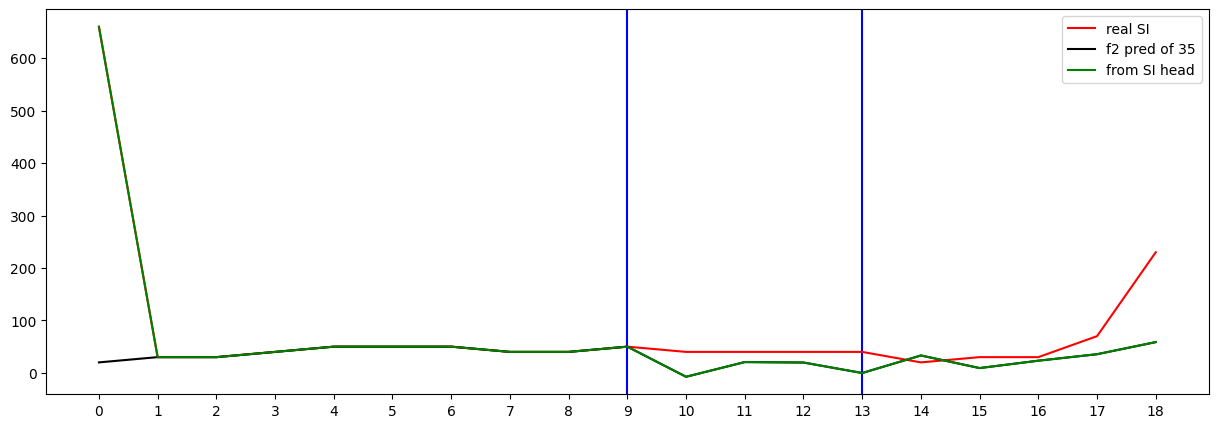

Testing R**2 - (all) - (no inputs):  0.9193830339480449
Testing R**2 - (f2) - SI full (no inputs):  -0.1555415740860604
Testing R**2 - SI head only (no inputs):  -0.1555415740860604
0 ...index R**2 (no inputs):  -0.632802004314829
1 ...index R**2 (no inputs):  -132.9959657784294
2 ...index R**2 (no inputs):  -0.1555415740860604
3 ...index R**2 (no inputs):  -75.06698667421286
4 ...index R**2 (no inputs):  -30.137770163585518
5 ...index R**2 (no inputs):  -135.7491311157729
6 ...index R**2 (no inputs):  -38.607620133255026
7 ...index R**2 (no inputs):  -7.017128759717785
8 ...index R**2 (no inputs):  -97.99301571787403
9 ...index R**2 (no inputs):  -18.400332170405
10 ...index R**2 (no inputs):  -618.9923390223167
11 ...index R**2 (no inputs):  -274.31510909619357
12 ...index R**2 (no inputs):  -1.5785339574946469
13 ...index R**2 (no inputs):  -25.05078582500907
14 ...index R**2 (no inputs):  -31.413675172587027
15 ...index R**2 (no inputs):  -105.24287175671654
16 ...index R**2 (no in

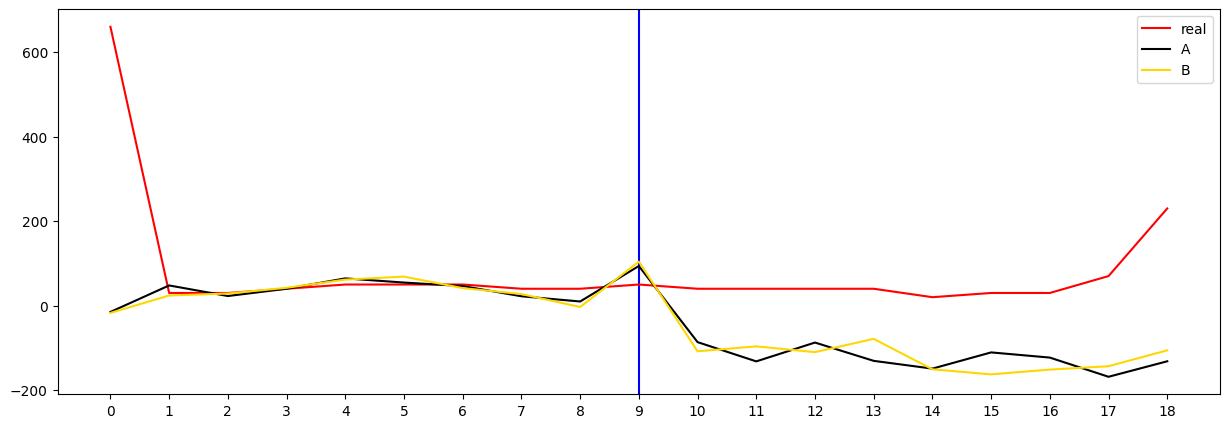

Which prediction is better? (A/B/skip): s


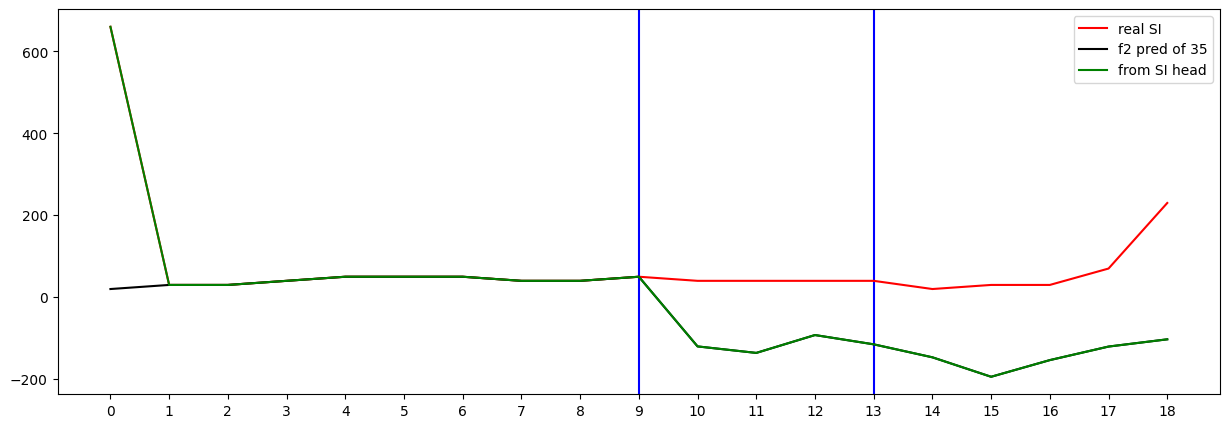

Testing R**2 - (all) - (no inputs):  0.8166892479708207
Testing R**2 - (f2) - SI full (no inputs):  -1.6452818690441031
Testing R**2 - SI head only (no inputs):  -1.6452818690441031
0 ...index R**2 (no inputs):  -3.3538439098357875
1 ...index R**2 (no inputs):  -127.6618369597914
2 ...index R**2 (no inputs):  -1.6452818690441031
3 ...index R**2 (no inputs):  -8.857113890107508
4 ...index R**2 (no inputs):  -175.39333710927488
5 ...index R**2 (no inputs):  -467.7626379575665
6 ...index R**2 (no inputs):  -34.22886720352963
7 ...index R**2 (no inputs):  -4.111441803294433
8 ...index R**2 (no inputs):  -11.196791957511463
9 ...index R**2 (no inputs):  -1524.728859248415
10 ...index R**2 (no inputs):  -8337.163064337108
11 ...index R**2 (no inputs):  -1443.1040775043305
12 ...index R**2 (no inputs):  -60.13268064111966
13 ...index R**2 (no inputs):  -96.58571673391455
14 ...index R**2 (no inputs):  -20.753189447639926
15 ...index R**2 (no inputs):  -1914.0273481216038
16 ...index R**2 (no 

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.418414
Loss_SI: 1.5048048496246338 Loss_all: 1.4117631912231445
===
[50] Train Loss: 0.263938
Loss_SI: 0.8185281753540039 Loss_all: 0.26143398880958557
===


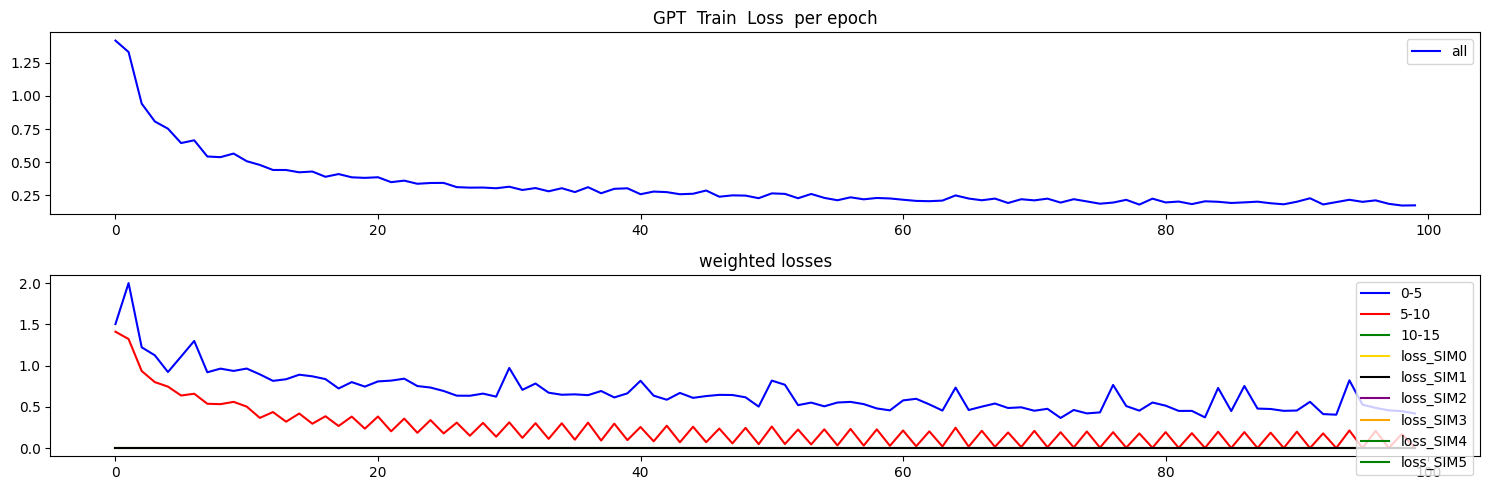

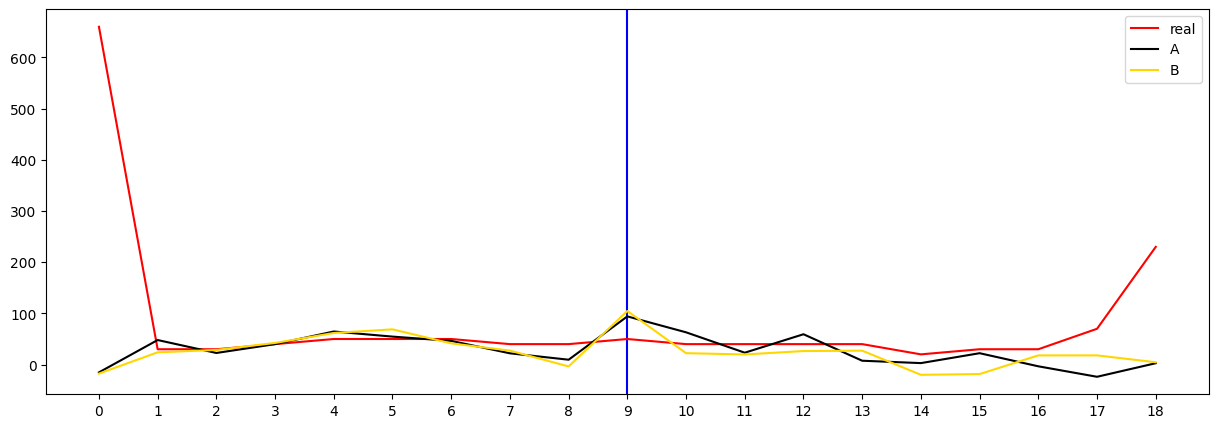

Which prediction is better? (A/B/skip): s


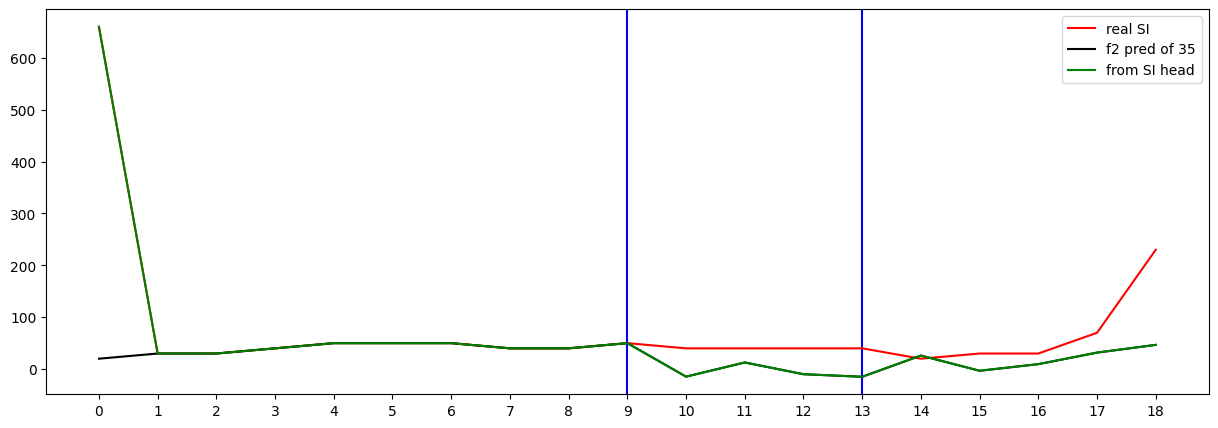

Testing R**2 - (all) - (no inputs):  0.9148454771482489
Testing R**2 - (f2) - SI full (no inputs):  -0.21881410252801192
Testing R**2 - SI head only (no inputs):  -0.21881410252801192
0 ...index R**2 (no inputs):  -1.7320998680756552
1 ...index R**2 (no inputs):  -85.17560164811492
2 ...index R**2 (no inputs):  -0.21881410252801192
3 ...index R**2 (no inputs):  -27.781196696692852
4 ...index R**2 (no inputs):  -17.44081551473108
5 ...index R**2 (no inputs):  -54.33936000848554
6 ...index R**2 (no inputs):  -46.94995832727808
7 ...index R**2 (no inputs):  -6.6124095552863515
8 ...index R**2 (no inputs):  -51.45842706273401
9 ...index R**2 (no inputs):  -116.47079603684186
10 ...index R**2 (no inputs):  -366.1594590244953
11 ...index R**2 (no inputs):  -104.72325009861137
12 ...index R**2 (no inputs):  -4.305336519873414
13 ...index R**2 (no inputs):  -21.7924263294075
14 ...index R**2 (no inputs):  -94.11762933118679
15 ...index R**2 (no inputs):  -95.04298002157793
16 ...index R**2 (no

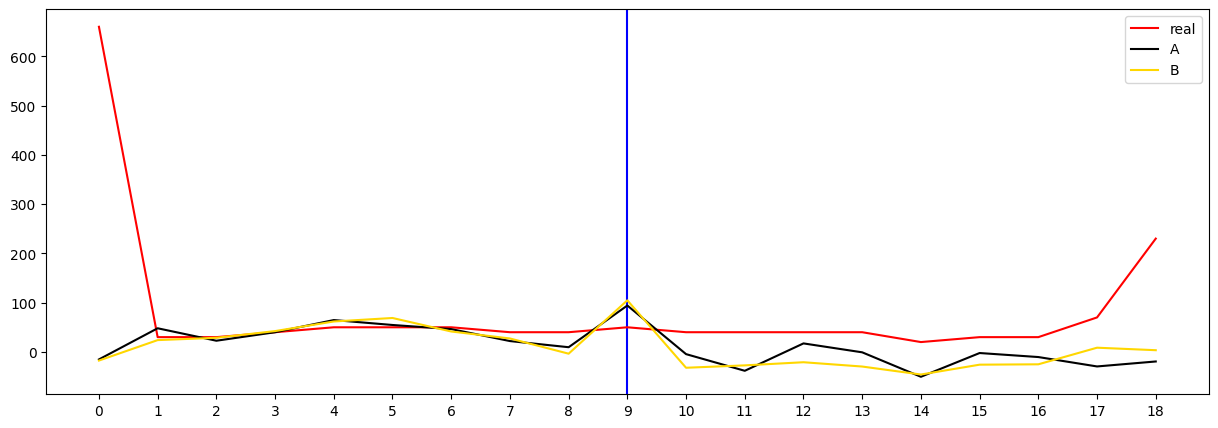

Which prediction is better? (A/B/skip): a
Saved preference.


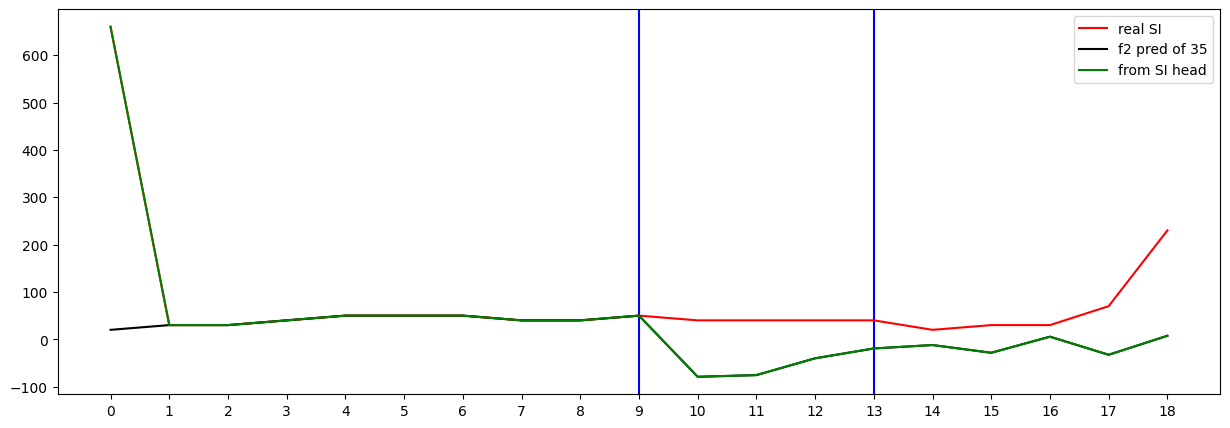

Testing R**2 - (all) - (no inputs):  0.8925328900146599
Testing R**2 - (f2) - SI full (no inputs):  -0.5378909884775236
Testing R**2 - SI head only (no inputs):  -0.5378909884775236
0 ...index R**2 (no inputs):  -3.8175411587982513
1 ...index R**2 (no inputs):  -9.655277118647467
2 ...index R**2 (no inputs):  -0.5378909884775236
3 ...index R**2 (no inputs):  -16.80619435291775
4 ...index R**2 (no inputs):  -113.1100634470846
5 ...index R**2 (no inputs):  -1744.9839476461734
6 ...index R**2 (no inputs):  -176.99155431870187
7 ...index R**2 (no inputs):  -62.23710949265686
8 ...index R**2 (no inputs):  -135.71414767973837
9 ...index R**2 (no inputs):  -37.11005354946438
10 ...index R**2 (no inputs):  -8643.037874698783
11 ...index R**2 (no inputs):  -3584.2030773587544
12 ...index R**2 (no inputs):  -39.89078384424527
13 ...index R**2 (no inputs):  -196.12903855294968
14 ...index R**2 (no inputs):  -18.100490363649225
15 ...index R**2 (no inputs):  -1552.5879891130908
16 ...index R**2 (n

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )





## R2 over accumulated Runs


In [49]:

inferenceGPT_obj.print_ALL_R2s_THE_END()


====================================400to500
1 .....................R² on first n steps - R²: 0.8348160550562691
Naive_R2:....................................R²: 0.9440
RMSE:10.6674,MAE:9.0902,MASE:0.1653
1 .......................R² on just step n - R²: 0.8348160550562691
Naive_R2:....................................R²: 0.9440
RMSE:10.6674,MAE:9.0902,MASE:0.1653
2 .....................R² on first n steps - R²: 0.8166797975817625
Naive_R2:....................................R²: 0.8705
RMSE:12.0258,MAE:10.0847,MASE:0.3879
2 .......................R² on just step n - R²: 0.7975632857817869
Naive_R2:....................................R²: 0.9289
RMSE:13.2456,MAE:11.0793,MASE:0.1847
3 .....................R² on first n steps - R²: 0.8231765385296185
Naive_R2:....................................R²: 0.8255
RMSE:12.2196,MAE:9.6732,MASE:0.5159
3 .......................R² on just step n - R²: 0.8339037156292929
Naive_R2:....................................R²: 0.9440
RMSE:12.5982,MAE:8.8502,MASE:

In [50]:

print("End")


End
